In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm 
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.options.display.float_format = '{:,.2f}'.format

# print every command of cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df_homeaudio = pd.read_csv("homeaudio.csv")

In [3]:
df_homeaudio.info()
df_homeaudio.shape
df_homeaudio.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
Unnamed: 0                   53 non-null int64
Week                         53 non-null int64
gmv                          53 non-null float64
list_price                   53 non-null float64
units                        53 non-null float64
product_mrp                  53 non-null float64
discount                     53 non-null float64
sla                          53 non-null float64
product_procurement_sla      53 non-null float64
% discount wrt list price    53 non-null float64
Total Investment             53 non-null float64
TV                           53 non-null float64
Digital                      53 non-null float64
Sponsorship                  53 non-null float64
Content Marketing            53 non-null float64
Online marketing             53 non-null float64
 Affiliates                  53 non-null float64
SEM                          53 non-null float64
Radio              

(53, 25)

,Unnamed: 0,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,26.00,53.00,"2,782,602.88","2,771,236.37","1,474.75","4,715,267.85","1,944,031.48",5.31,2.45,0.62,...,"4,139,171.33","1,311,113.56","1,913,926.12","100,052.55","150,078.82",46.21,"1,091.25",14.02,0.25,0.55
std,15.44,15.44,"1,743,627.74","1,735,765.52",914.27,"3,267,826.73","1,546,335.48",1.36,0.67,0.19,...,"2,113,424.72","648,226.62","1,851,694.19","186,273.29","269,451.53",11.87,280.57,9.32,0.59,1.45
min,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,13.00,40.00,"2,319,685.00","2,303,323.00","1,258.00","3,689,356.00","1,329,534.00",5.40,2.36,0.59,...,"2,494,132.76","829,592.87","1,118,077.90",0.00,0.00,46.93,"1,052.00",6.00,0.00,0.00
50%,26.00,53.00,"2,668,170.00","2,643,253.00","1,457.00","4,334,678.00","1,764,925.00",5.64,2.55,0.65,...,"5,038,104.86","1,602,693.73","1,333,428.35",0.00,0.00,47.31,"1,185.29",13.00,0.00,0.00
75%,39.00,66.00,"3,132,340.00","3,129,478.00","1,698.00","5,458,358.00","2,319,230.00",5.79,2.71,0.72,...,"5,770,035.52","1,750,448.91","1,771,746.29","159,336.29","214,890.32",50.52,"1,222.00",22.00,0.00,0.00
max,52.00,79.00,"12,293,024.00","12,237,300.00","6,455.00","23,084,478.00","10,847,178.00",6.35,4.00,0.92,...,"6,249,002.43","1,889,691.77","8,186,188.71","692,288.71","1,038,433.06",59.99,"1,242.00",30.00,3.00,7.00


In [4]:
df_homeaudio = df_homeaudio.loc[:, ~df_homeaudio.columns.str.contains('^Unnamed')]
df_homeaudio.head()
df_homeaudio.shape
df_homeaudio = df_homeaudio.dropna()
df_homeaudio.shape

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,27,"23,853.00","23,853.00",12.00,"36,986.00","13,133.00",4.50,3.00,0.55,"2,083,187.74",...,"162,056.31","66,817.93","613,377.25",0.00,0.00,54.60,"1,177.00",10,1.00,0.00
1,28,"2,529,221.00","2,521,061.00","1,263.00","3,881,172.00","1,360,111.00",5.83,2.53,0.54,"3,958,056.71",...,"307,906.99","126,954.07","1,165,416.78",0.00,0.00,54.60,"1,177.00",3,0.00,0.00
2,29,"3,014,018.00","2,997,096.00","1,538.00","4,762,021.00","1,764,925.00",5.75,2.58,0.59,"4,374,694.26",...,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00",18,0.00,2.00
3,30,"2,565,623.00","2,549,945.00","1,379.00","4,056,581.00","1,506,636.00",5.83,2.64,0.59,"4,374,694.26",...,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00",25,0.00,0.00
4,31,"1,954,770.00","1,939,004.00","1,011.00","3,105,900.00","1,166,896.00",5.92,2.61,0.60,"3,788,753.34",...,"281,807.85","117,189.11","1,165,498.79",0.00,0.00,56.14,"1,185.29",13,1.00,0.00


(53, 24)

(53, 24)

<Figure size 1440x1080 with 0 Axes>

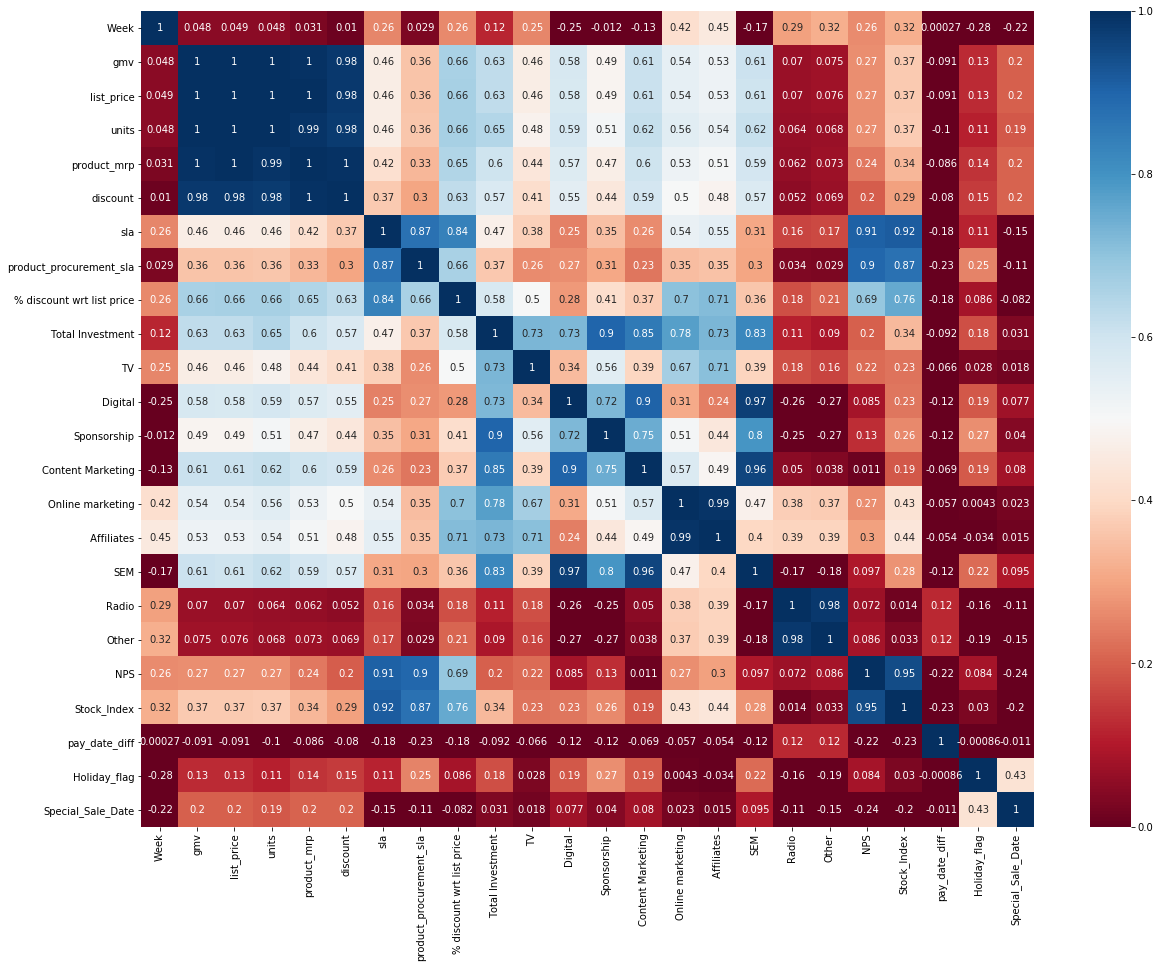

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(df_homeaudio.corr(),vmin=0,vmax=1,annot=True,cmap='RdBu')

In [6]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

In [7]:
# Get list of columns and remove 'gmv' column (Y)
num_vars = list(df_homeaudio.columns)
##num_vars.remove('gmv')
num_vars
df_homeaudio[num_vars] = scaler.fit_transform(df_homeaudio[num_vars])

['Week',
 'gmv',
 'list_price',
 'units',
 'product_mrp',
 'discount',
 'sla',
 'product_procurement_sla',
 '% discount wrt list price',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 ' Affiliates',
 'SEM',
 'Radio',
 'Other',
 'NPS',
 'Stock_Index',
 'pay_date_diff',
 'Holiday_flag',
 'Special_Sale_Date']

In [8]:
df_homeaudio.shape

(53, 24)

In [9]:
df_homeaudio.head()
df_homeaudio.describe()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,0.00,0.00,0.00,0.00,0.00,0.00,0.71,0.75,0.60,0.05,...,0.03,0.04,0.07,0.00,0.00,0.91,0.95,0.33,0.33,0.00
1,0.02,0.21,0.21,0.20,0.17,0.13,0.92,0.63,0.59,0.09,...,0.05,0.07,0.14,0.00,0.00,0.91,0.95,0.10,0.00,0.00
2,0.04,0.25,0.24,0.24,0.21,0.16,0.90,0.64,0.64,0.10,...,0.05,0.07,0.16,0.00,0.00,0.91,0.95,0.60,0.00,0.29
3,0.06,0.21,0.21,0.21,0.18,0.14,0.92,0.66,0.64,0.10,...,0.05,0.07,0.16,0.00,0.00,0.91,0.95,0.83,0.00,0.00
4,0.08,0.16,0.16,0.16,0.13,0.11,0.93,0.65,0.65,0.09,...,0.05,0.06,0.14,0.00,0.00,0.94,0.95,0.43,0.33,0.00


,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,0.50,0.23,0.23,0.23,0.20,0.18,0.84,0.61,0.68,0.41,...,0.66,0.69,0.23,0.14,0.14,0.77,0.88,0.47,0.08,0.08
std,0.30,0.14,0.14,0.14,0.14,0.14,0.21,0.17,0.21,0.24,...,0.34,0.34,0.23,0.27,0.26,0.20,0.23,0.31,0.20,0.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.19,0.19,0.19,0.16,0.12,0.85,0.59,0.64,0.30,...,0.40,0.44,0.14,0.00,0.00,0.78,0.85,0.20,0.00,0.00
50%,0.50,0.22,0.22,0.23,0.19,0.16,0.89,0.64,0.71,0.43,...,0.81,0.85,0.16,0.00,0.00,0.79,0.95,0.43,0.00,0.00
75%,0.75,0.25,0.26,0.26,0.24,0.21,0.91,0.68,0.78,0.57,...,0.92,0.93,0.22,0.23,0.21,0.84,0.98,0.73,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [10]:
y_train = df_homeaudio.pop('gmv')
X_train = df_homeaudio

# Add a constant using sm.add_constant(X) because if we don't perform this step, 
# statsmodels fits a regression line passing through the origin, by default.
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# We will check the parameters obtained
lr_1.params
lr_1.summary()

const                       -0.00
Week                         0.00
list_price                   0.79
units                        0.03
product_mrp                  0.34
discount                    -0.16
sla                         -0.00
product_procurement_sla      0.00
% discount wrt list price    0.00
Total Investment             0.01
TV                          -0.01
Digital                      0.00
Sponsorship                 -0.01
Content Marketing           -0.01
Online marketing            -0.02
 Affiliates                  0.01
SEM                          0.01
Radio                       -0.00
Other                        0.00
NPS                          0.00
Stock_Index                 -0.01
pay_date_diff                0.00
Holiday_flag                 0.00
Special_Sale_Date           -0.00
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.459e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.72e-73
Time:                        22:01:17   Log-Likelihood:                 349.53
No. Observations:                  53   AIC:                            -653.1
Df Residuals:                      30   BIC:                            -607.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0003      0.000     -0.779      0.442      -0.001       0.000
Week                          0.0008      0.000      1.766      0.088      -0.000       0.002
list_price                    0.7879      0.009     85.419      0.000       0.769       0.807
units                         0.0324      0.009      3.748      0.001       0.015       0.050
product_mrp                   0.3409      0.003    110.573      0.000       0.335       0.347
discount                     -0.1634      0.006    -27.423      0.000      -0.176      -0.151
sla                          -0.0018      0.002     -1.059      0.298      -0.005       0.002
product_procurement_sla       0.0028      0.002      1.189      0.244      -0.002       0.008
% discount wrt list price     0.0028      0.001      2.046      0.050    5.33e-06       0.006
Total Investment              0.0126      0.051      0.246      0.808      -0.092       0.117
TV                           -0.0054      0.006     -0.970      0.340      -0.017       0.006
Digital                       0.0006      0.015      0.041      0.968      -0.030       0.031
Sponsorship                  -0.0059      0.026     -0.224      0.825      -0.059       0.048
Content Marketing            -0.0089      0.005     -1.914      0.065      -0.018       0.001
Online marketing             -0.0155      0.009     -1.648      0.110      -0.035       0.004
 Affiliates                   0.0145      0.007      1.996      0.055      -0.000       0.029
SEM                           0.0101      0.005      2.117      0.043       0.000       0.020
Radio                        -0.0006      0.009     -0.060      0.953      -0.020       0.019
Other                         0.0004      0.002      0.222      0.826      -0.003       0.004
NPS                           0.0032      0.004      0.907      0.372      -0.004       0.011
Stock_Index                  -0.0071      0.003     -2.363      0.025      -0.013      -0.001
pay_date_diff                 0.0002      0.000      1.125      0.269      -0.000       0.001
Holiday_flag                  0.0007      0.001      1.341      0.190      -0.000       0.002
Special_Sale_Date         -8.814e-05      0.000     -0.209      0.836      -0.001       0.001
==============================================================================
Omnibus:                        0.977   Durbin-Watson:                   2.765
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.501
Skew:                           0.225   Prob(JB):                        0.778
Kurtosis:                       3.154   Cond. No.                     1.37e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the

In [11]:
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,product_mrp,inf
4,discount,inf
1,list_price,inf
8,Total Investment,"165,708.71"
11,Sponsorship,"38,891.14"
13,Online marketing,"13,231.91"
14,Affiliates,"8,457.12"
10,Digital,"5,394.93"
16,Radio,"2,201.22"
18,NPS,"2,191.87"


## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [12]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# let's start with 15 variables
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col
X_train.columns[~rfe.support_]

[('Week', False, 3),
 ('list_price', True, 1),
 ('units', True, 1),
 ('product_mrp', True, 1),
 ('discount', True, 1),
 ('sla', True, 1),
 ('product_procurement_sla', False, 2),
 ('% discount wrt list price', True, 1),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', False, 4),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 (' Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', False, 7),
 ('Other', False, 6),
 ('NPS', True, 1),
 ('Stock_Index', True, 1),
 ('pay_date_diff', False, 8),
 ('Holiday_flag', False, 5),
 ('Special_Sale_Date', False, 9)]

Index(['list_price', 'units', 'product_mrp', 'discount', 'sla',
       '% discount wrt list price', 'Total Investment', 'TV', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'NPS',
       'Stock_Index'],
      dtype='object')

Index(['Week', 'product_procurement_sla', 'Digital', 'Radio', 'Other',
       'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [14]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.924e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.61e-93
Time:                        22:01:17   Log-Likelihood:                 343.68
No. Observations:                  53   AIC:                            -657.4
Df Residuals:                      38   BIC:                            -627.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,list_price,inf
3,product_mrp,inf
4,discount,inf
12,Affiliates,"1,137.07"
11,Online marketing,"1,075.10"
7,Total Investment,390.62
2,units,277.91
10,Content Marketing,198.23
13,SEM,119.32
14,NPS,90.94


In [15]:
# Drop variable
X_train_new = X_train_rfe.drop(["list_price"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.924e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.61e-93
Time:                        22:01:17   Log-Likelihood:                 343.68
No. Observations:                  53   AIC:                            -657.4
Df Residuals:                      38   BIC:                            -627.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,product_mrp,"1,427.25"
11,Affiliates,"1,137.07"
10,Online marketing,"1,075.10"
3,discount,588.81
6,Total Investment,390.62
1,units,277.91
9,Content Marketing,198.23
12,SEM,119.32
13,NPS,90.94
14,Stock_Index,90.47


In [16]:
# Drop variable
X_train_new = X_train_new.drop(["product_mrp"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1270.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           5.63e-47
Time:                        22:01:17   Log-Likelihood:                 189.16
No. Observations:                  53   AIC:                            -350.3
Df Residuals:                      39   BIC:                            -322.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
10,Affiliates,"1,057.50"
9,Online marketing,994.36
5,Total Investment,357.46
8,Content Marketing,180.86
11,SEM,107.21
12,NPS,89.22
13,Stock_Index,84.67
6,TV,77.48
1,units,60.50
2,discount,57.34


In [17]:
# Drop variable
X_train_new = X_train_new.drop([" Affiliates"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1294.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           8.20e-48
Time:                        22:01:17   Log-Likelihood:                 186.87
No. Observations:                  53   AIC:                            -347.7
Df Residuals:                      40   BIC:                            -322.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
5,Total Investment,215.41
8,Content Marketing,131.17
10,SEM,73.88
1,units,59.09
2,discount,56.41
11,NPS,55.08
12,Stock_Index,48.54
7,Sponsorship,48.28
3,sla,23.04
9,Online marketing,18.44


In [18]:
# Drop variable
X_train_new = X_train_new.drop(["Total Investment"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1406.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.77e-49
Time:                        22:01:18   Log-Likelihood:                 186.11
No. Observations:                  53   AIC:                            -348.2
Df Residuals:                      41   BIC:                            -324.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
10,NPS,54.66
1,units,51.01
9,SEM,50.72
2,discount,49.43
11,Stock_Index,48.50
7,Content Marketing,43.57
3,sla,22.46
0,const,17.56
8,Online marketing,13.23
4,% discount wrt list price,9.78


In [19]:
# Drop variable
X_train_new = X_train_new.drop(['NPS'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1584.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           9.25e-51
Time:                        22:01:18   Log-Likelihood:                 186.10
No. Observations:                  53   AIC:                            -350.2
Df Residuals:                      42   BIC:                            -328.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,units,46.28
2,discount,44.96
9,SEM,36.44
7,Content Marketing,34.38
0,const,17.45
3,sla,13.04
10,Stock_Index,10.78
4,% discount wrt list price,9.37
8,Online marketing,5.51
6,Sponsorship,3.89


In [20]:
# Drop variable
X_train_new = X_train_new.drop(["units"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     296.4
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.08e-35
Time:                        22:01:18   Log-Likelihood:                 138.62
No. Observations:                  53   AIC:                            -257.2
Df Residuals:                      43   BIC:                            -237.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
8,SEM,34.30
6,Content Marketing,32.10
0,const,17.45
9,Stock_Index,10.52
2,sla,10.31
3,% discount wrt list price,8.19
7,Online marketing,5.14
5,Sponsorship,3.86
1,discount,2.89
4,TV,2.82


In [21]:
# Drop variable
X_train_new = X_train_new.drop(["SEM"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     309.9
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.49e-36
Time:                        22:01:18   Log-Likelihood:                 136.12
No. Observations:                  53   AIC:                            -254.2
Df Residuals:                      44   BIC:                            -236.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,17.34
2,sla,9.80
3,% discount wrt list price,7.71
8,Stock_Index,7.08
6,Content Marketing,3.84
7,Online marketing,3.66
5,Sponsorship,3.05
1,discount,2.79
4,TV,2.48


In [22]:
# Drop variable
X_train_new = X_train_new.drop(["const"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     309.9
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.49e-36
Time:                        22:01:18   Log-Likelihood:                 136.12
No. Observations:                  53   AIC:                            -254.2
Df Residuals:                      44   BIC:                            -236.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,sla,159.49
7,Stock_Index,112.32
2,% discount wrt list price,91.99
6,Online marketing,17.97
4,Sponsorship,8.07
3,TV,7.84
0,discount,7.27
5,Content Marketing,6.29


In [23]:
# Drop variable
X_train_new = X_train_new.drop(["sla"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     270.6
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.39e-34
Time:                        22:01:18   Log-Likelihood:                 128.54
No. Observations:                  53   AIC:                            -241.1
Df Residuals:                      45   BIC:                            -225.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
1,% discount wrt list price,74.66
6,Stock_Index,37.71
5,Online marketing,17.83
3,Sponsorship,8.07
2,TV,7.52
0,discount,6.97
4,Content Marketing,6.25


In [24]:
# Drop variable
X_train_new = X_train_new.drop(["% discount wrt list price"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     311.6
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.61e-35
Time:                        22:01:19   Log-Likelihood:                 127.64
No. Observations:                  53   AIC:                            -241.3
Df Residuals:                      46   BIC:                            -227.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0028      0.01

,Features,VIF
4,Online marketing,13.75
2,Sponsorship,7.96
5,Stock_Index,7.91
1,TV,7.49
3,Content Marketing,5.71
0,discount,4.56


In [25]:
# Drop variable
X_train_new = X_train_new.drop(['Online marketing'], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     380.8
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           8.42e-37
Time:                        22:01:19   Log-Likelihood:                 127.55
No. Observations:                  53   AIC:                            -243.1
Df Residuals:                      47   BIC:                            -231.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0028      0.01

,Features,VIF
2,Sponsorship,7.63
1,TV,4.91
3,Content Marketing,4.76
4,Stock_Index,4.58
0,discount,4.55


In [26]:
# Drop variable
X_train_new = X_train_new.drop(["Sponsorship"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     483.9
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.97e-38
Time:                        22:01:19   Log-Likelihood:                 127.43
No. Observations:                  53   AIC:                            -244.9
Df Residuals:                      48   BIC:                            -235.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0029      0.01

,Features,VIF
0,discount,4.45
3,Stock_Index,4.05
1,TV,3.96
2,Content Marketing,2.62


In [27]:
# Drop variable
X_train_new = X_train_new.drop(["Content Marketing"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     641.1
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.69e-39
Time:                        22:01:19   Log-Likelihood:                 126.74
No. Observations:                  53   AIC:                            -245.5
Df Residuals:                      49   BIC:                            -237.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0024      0.013      0.188      

,Features,VIF
2,Stock_Index,4.02
1,TV,3.81
0,discount,3.31


In [28]:
X_train_new.columns

Index(['discount', 'TV', 'Stock_Index'], dtype='object')

In [29]:
drop_columns_list = list(set(num_vars) - set(list(X_train_new.columns)))
print(drop_columns_list)

['Online marketing', 'sla', 'Total Investment', ' Affiliates', 'list_price', 'Sponsorship', 'Content Marketing', 'Other', 'gmv', 'Digital', 'Week', '% discount wrt list price', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date', 'units', 'SEM', 'product_mrp', 'NPS', 'product_procurement_sla', 'Radio']


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_new, y_train, scoring='r2', cv=folds)
scores   


array([0.9918799 , 0.88609139, 0.87575752, 0.94989898, 0.71640369,
       0.81388336, 0.91219199, 0.81367876, 0.994569  , 0.97281669])

In [31]:
y_pred = cross_val_predict(lm, X_train_new, y_train, cv=folds)


In [32]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0006075959089018438
r_square_value : 0.9692179677773067


Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

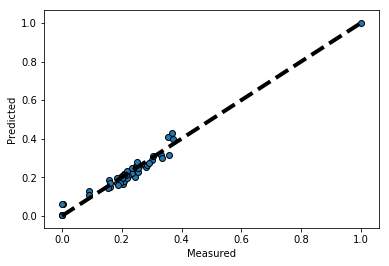

In [33]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Koyck Model

In [34]:
df_homeaudio = pd.read_csv("homeaudio.csv")

In [35]:
df_homeaudio.info()
df_homeaudio.shape
df_homeaudio.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
Unnamed: 0                   53 non-null int64
Week                         53 non-null int64
gmv                          53 non-null float64
list_price                   53 non-null float64
units                        53 non-null float64
product_mrp                  53 non-null float64
discount                     53 non-null float64
sla                          53 non-null float64
product_procurement_sla      53 non-null float64
% discount wrt list price    53 non-null float64
Total Investment             53 non-null float64
TV                           53 non-null float64
Digital                      53 non-null float64
Sponsorship                  53 non-null float64
Content Marketing            53 non-null float64
Online marketing             53 non-null float64
 Affiliates                  53 non-null float64
SEM                          53 non-null float64
Radio              

(53, 25)

,Unnamed: 0,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,26.00,53.00,"2,782,602.88","2,771,236.37","1,474.75","4,715,267.85","1,944,031.48",5.31,2.45,0.62,...,"4,139,171.33","1,311,113.56","1,913,926.12","100,052.55","150,078.82",46.21,"1,091.25",14.02,0.25,0.55
std,15.44,15.44,"1,743,627.74","1,735,765.52",914.27,"3,267,826.73","1,546,335.48",1.36,0.67,0.19,...,"2,113,424.72","648,226.62","1,851,694.19","186,273.29","269,451.53",11.87,280.57,9.32,0.59,1.45
min,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,13.00,40.00,"2,319,685.00","2,303,323.00","1,258.00","3,689,356.00","1,329,534.00",5.40,2.36,0.59,...,"2,494,132.76","829,592.87","1,118,077.90",0.00,0.00,46.93,"1,052.00",6.00,0.00,0.00
50%,26.00,53.00,"2,668,170.00","2,643,253.00","1,457.00","4,334,678.00","1,764,925.00",5.64,2.55,0.65,...,"5,038,104.86","1,602,693.73","1,333,428.35",0.00,0.00,47.31,"1,185.29",13.00,0.00,0.00
75%,39.00,66.00,"3,132,340.00","3,129,478.00","1,698.00","5,458,358.00","2,319,230.00",5.79,2.71,0.72,...,"5,770,035.52","1,750,448.91","1,771,746.29","159,336.29","214,890.32",50.52,"1,222.00",22.00,0.00,0.00
max,52.00,79.00,"12,293,024.00","12,237,300.00","6,455.00","23,084,478.00","10,847,178.00",6.35,4.00,0.92,...,"6,249,002.43","1,889,691.77","8,186,188.71","692,288.71","1,038,433.06",59.99,"1,242.00",30.00,3.00,7.00


In [36]:
df_homeaudio = df_homeaudio.loc[:, ~df_homeaudio.columns.str.contains('^Unnamed')]
df_homeaudio.head()
df_homeaudio.shape
df_homeaudio = df_homeaudio.dropna()
df_homeaudio.shape

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,27,"23,853.00","23,853.00",12.00,"36,986.00","13,133.00",4.50,3.00,0.55,"2,083,187.74",...,"162,056.31","66,817.93","613,377.25",0.00,0.00,54.60,"1,177.00",10,1.00,0.00
1,28,"2,529,221.00","2,521,061.00","1,263.00","3,881,172.00","1,360,111.00",5.83,2.53,0.54,"3,958,056.71",...,"307,906.99","126,954.07","1,165,416.78",0.00,0.00,54.60,"1,177.00",3,0.00,0.00
2,29,"3,014,018.00","2,997,096.00","1,538.00","4,762,021.00","1,764,925.00",5.75,2.58,0.59,"4,374,694.26",...,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00",18,0.00,2.00
3,30,"2,565,623.00","2,549,945.00","1,379.00","4,056,581.00","1,506,636.00",5.83,2.64,0.59,"4,374,694.26",...,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00",25,0.00,0.00
4,31,"1,954,770.00","1,939,004.00","1,011.00","3,105,900.00","1,166,896.00",5.92,2.61,0.60,"3,788,753.34",...,"281,807.85","117,189.11","1,165,498.79",0.00,0.00,56.14,"1,185.29",13,1.00,0.00


(53, 24)

(53, 24)

<Figure size 1440x1080 with 0 Axes>

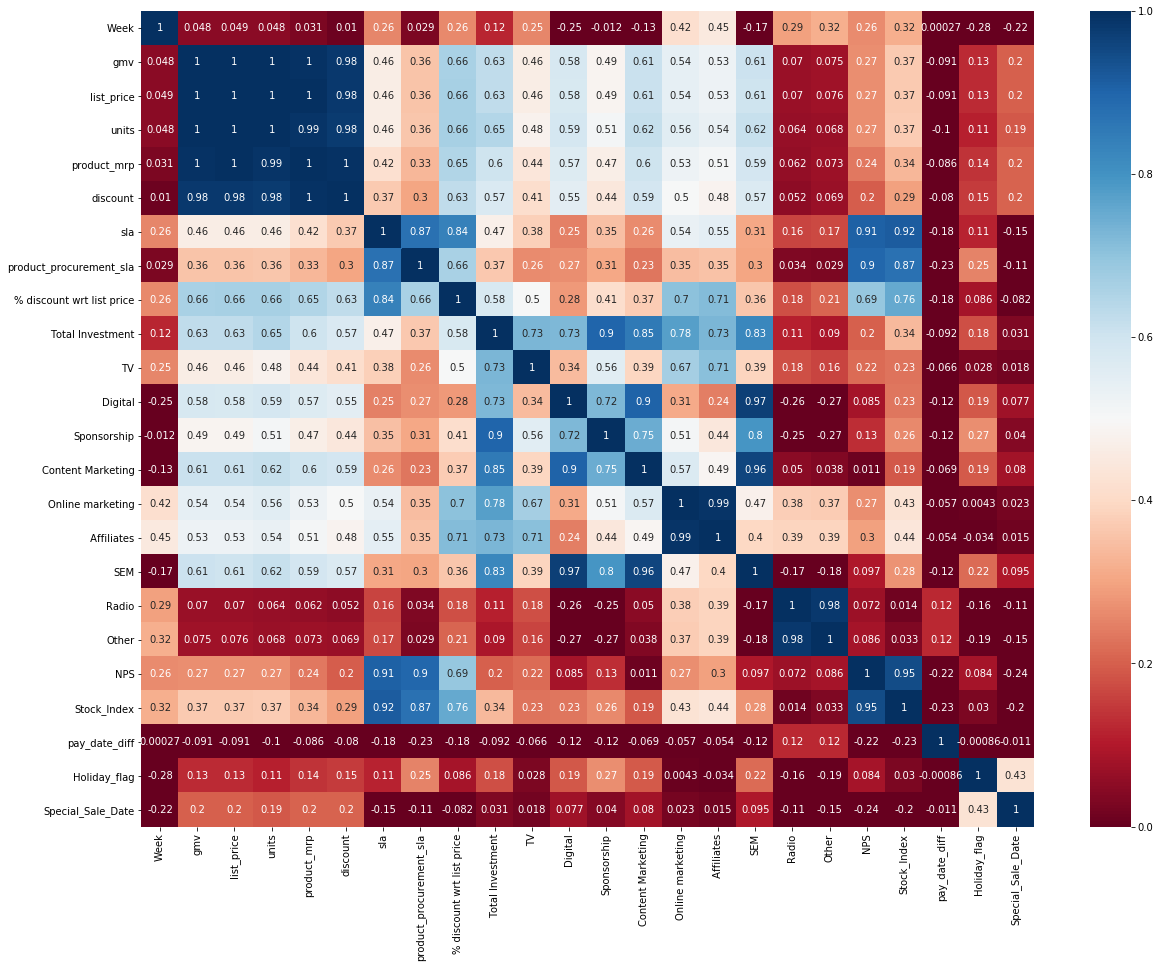

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(df_homeaudio.corr(),vmin=0,vmax=1,annot=True,cmap='RdBu')

In [38]:
df_homeaudio['gmv_lag_1']=df_homeaudio['gmv'].shift(1)
df_homeaudio['gmv_lag_1']=df_homeaudio['gmv_lag_1'].fillna(df_homeaudio['gmv'].mean())

In [39]:
# Moving averages on Pricing & Promotional Offer Related KPIs
df_homeaudio['LP_MA_3']=df_homeaudio.list_price.rolling(window=3).mean()
df_homeaudio['LP_MA_5']=df_homeaudio.list_price.rolling(window=5).mean()
df_homeaudio['DISC_MA_3']=df_homeaudio.discount.rolling(window=3).mean()
df_homeaudio['DISC_MA_5']=df_homeaudio.discount.rolling(window=5).mean()
df_homeaudio['PM_MA_3']=df_homeaudio.product_mrp.rolling(window=3).mean()
df_homeaudio['PM_MA_5']=df_homeaudio.product_mrp.rolling(window=5).mean()

In [40]:
df_homeaudio['LP_MA_3']=df_homeaudio['LP_MA_3'].fillna(df_homeaudio['LP_MA_3'].mean())
df_homeaudio['LP_MA_5']=df_homeaudio['LP_MA_5'].fillna(df_homeaudio['LP_MA_5'].mean())
df_homeaudio['DISC_MA_3']=df_homeaudio['DISC_MA_3'].fillna(df_homeaudio['DISC_MA_3'].mean())
df_homeaudio['DISC_MA_5']=df_homeaudio['DISC_MA_5'].fillna(df_homeaudio['DISC_MA_5'].mean()) 
df_homeaudio['PM_MA_3']=df_homeaudio['PM_MA_3'].fillna(df_homeaudio['PM_MA_3'].mean())
df_homeaudio['PM_MA_5']=df_homeaudio['PM_MA_5'].fillna(df_homeaudio['PM_MA_5'].mean()) 

In [41]:
# as Moving averages are used Respective columns will be dropped
df_homeaudio=df_homeaudio.drop('list_price',axis=1)
df_homeaudio=df_homeaudio.drop('discount',axis=1)
df_homeaudio=df_homeaudio.drop('product_mrp',axis=1)

In [42]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

In [43]:
# Get list of columns and remove 'gmv' column (Y)
num_vars = list(df_homeaudio.columns)
##num_vars.remove('gmv')
num_vars
df_homeaudio[num_vars] = scaler.fit_transform(df_homeaudio[num_vars])

['Week',
 'gmv',
 'units',
 'sla',
 'product_procurement_sla',
 '% discount wrt list price',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 ' Affiliates',
 'SEM',
 'Radio',
 'Other',
 'NPS',
 'Stock_Index',
 'pay_date_diff',
 'Holiday_flag',
 'Special_Sale_Date',
 'gmv_lag_1',
 'LP_MA_3',
 'LP_MA_5',
 'DISC_MA_3',
 'DISC_MA_5',
 'PM_MA_3',
 'PM_MA_5']

In [44]:
df_homeaudio.shape

(53, 28)

In [45]:
df_homeaudio.head()
df_homeaudio.describe()

,Week,gmv,units,sla,product_procurement_sla,% discount wrt list price,Total Investment,TV,Digital,Sponsorship,...,pay_date_diff,Holiday_flag,Special_Sale_Date,gmv_lag_1,LP_MA_3,LP_MA_5,DISC_MA_3,DISC_MA_5,PM_MA_3,PM_MA_5
0,0.00,0.00,0.00,0.71,0.75,0.60,0.05,0.01,0.10,0.04,...,0.33,0.33,0.00,0.23,0.42,0.49,0.37,0.45,0.40,0.47
1,0.02,0.21,0.20,0.92,0.63,0.59,0.09,0.02,0.18,0.08,...,0.10,0.00,0.00,0.00,0.42,0.49,0.37,0.45,0.40,0.47
2,0.04,0.25,0.24,0.90,0.64,0.64,0.10,0.02,0.20,0.09,...,0.60,0.00,0.29,0.21,0.27,0.49,0.19,0.45,0.24,0.47
3,0.06,0.21,0.21,0.92,0.66,0.64,0.10,0.02,0.20,0.09,...,0.83,0.00,0.00,0.25,0.40,0.49,0.29,0.45,0.35,0.47
4,0.08,0.16,0.16,0.93,0.65,0.65,0.09,0.02,0.18,0.07,...,0.43,0.33,0.00,0.21,0.37,0.32,0.27,0.23,0.33,0.28


,Week,gmv,units,sla,product_procurement_sla,% discount wrt list price,Total Investment,TV,Digital,Sponsorship,...,pay_date_diff,Holiday_flag,Special_Sale_Date,gmv_lag_1,LP_MA_3,LP_MA_5,DISC_MA_3,DISC_MA_5,PM_MA_3,PM_MA_5
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,0.50,0.23,0.23,0.84,0.61,0.68,0.41,0.40,0.19,0.36,...,0.47,0.08,0.08,0.23,0.42,0.49,0.37,0.45,0.40,0.47
std,0.30,0.14,0.14,0.21,0.17,0.21,0.24,0.27,0.23,0.28,...,0.31,0.20,0.21,0.14,0.18,0.21,0.20,0.23,0.19,0.22
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.19,0.19,0.85,0.59,0.64,0.30,0.17,0.08,0.15,...,0.20,0.00,0.00,0.19,0.34,0.37,0.27,0.30,0.30,0.34
50%,0.50,0.22,0.23,0.89,0.64,0.71,0.43,0.47,0.12,0.31,...,0.43,0.00,0.00,0.22,0.41,0.49,0.36,0.45,0.39,0.47
75%,0.75,0.25,0.26,0.91,0.68,0.78,0.57,0.58,0.18,0.49,...,0.73,0.00,0.00,0.25,0.51,0.58,0.46,0.53,0.49,0.57
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [46]:
y_train = df_homeaudio.pop('gmv')
X_train = df_homeaudio

# Add a constant using sm.add_constant(X) because if we don't perform this step, 
# statsmodels fits a regression line passing through the origin, by default.
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# We will check the parameters obtained
lr_1.params
lr_1.summary()

const                       -0.01
Week                         0.02
units                        0.98
sla                         -0.02
product_procurement_sla     -0.02
% discount wrt list price    0.03
Total Investment             1.80
TV                          -0.22
Digital                     -0.56
Sponsorship                 -0.92
Content Marketing           -0.10
Online marketing            -0.45
 Affiliates                  0.10
SEM                          0.28
Radio                       -0.31
Other                        0.01
NPS                          0.08
Stock_Index                 -0.05
pay_date_diff                0.01
Holiday_flag                 0.01
Special_Sale_Date            0.00
gmv_lag_1                   -0.01
LP_MA_3                     -0.13
LP_MA_5                     -0.04
DISC_MA_3                    0.13
DISC_MA_5                    0.05
PM_MA_3                     -0.01
PM_MA_5                      0.00
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     522.8
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.65e-30
Time:                        22:01:27   Log-Likelihood:                 192.69
No. Observations:                  53   AIC:                            -333.4
Df Residuals:                      27   BIC:                            -282.2
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -0.0077      0.008     -1.029      0.312      -0.023       0.008
Week                          0.0247      0.009      2.690      0.012       0.006       0.044
units                         0.9796      0.021     45.695      0.000       0.936       1.024
sla                          -0.0183      0.037     -0.497      0.623      -0.094       0.057
product_procurement_sla      -0.0212      0.041     -0.516      0.610      -0.106       0.063
% discount wrt list price     0.0280      0.023      1.231      0.229      -0.019       0.075
Total Investment              1.8000      1.258      1.430      0.164      -0.782       4.382
TV                           -0.2220      0.134     -1.663      0.108      -0.496       0.052
Digital                      -0.5586      0.366     -1.525      0.139      -1.310       0.193
Sponsorship                  -0.9167      0.643     -1.425      0.166      -2.237       0.404
Content Marketing            -0.0986      0.122     -0.809      0.426      -0.349       0.152
Online marketing             -0.4537      0.225     -2.013      0.054      -0.916       0.009
 Affiliates                   0.1044      0.157      0.666      0.511      -0.217       0.426
SEM                           0.2782      0.155      1.792      0.084      -0.040       0.597
Radio                        -0.3079      0.229     -1.344      0.190      -0.778       0.162
Other                         0.0058      0.034      0.171      0.866      -0.064       0.075
NPS                           0.0809      0.071      1.144      0.262      -0.064       0.226
Stock_Index                  -0.0535      0.061     -0.873      0.390      -0.179       0.072
pay_date_diff                 0.0050      0.005      1.077      0.291      -0.005       0.015
Holiday_flag                  0.0113      0.012      0.919      0.366      -0.014       0.036
Special_Sale_Date             0.0041      0.010      0.394      0.697      -0.017       0.025
gmv_lag_1                    -0.0087      0.016     -0.528      0.601      -0.042       0.025
LP_MA_3                      -0.1268      0.122     -1.041      0.307      -0.377       0.123
LP_MA_5                      -0.0351      0.103     -0.342      0.735      -0.246       0.176
DISC_MA_3                     0.1268      0.119      1.063      0.297      -0.118       0.372
DISC_MA_5                     0.0528      0.099      0.531      0.600      -0.151       0.257
PM_MA_3                      -0.0142      0.017     -0.829      0.414      -0.049       0.021
PM_MA_5                       0.0036      0.016      0.224      0.824      -0.029       0.037
==============================================================================
Omnibus:                        0.510   Durbin-Watson:                   2.602
Prob(Omnibu

In [47]:
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,PM_MA_5,inf
25,PM_MA_3,inf
24,DISC_MA_5,inf
23,DISC_MA_3,inf
22,LP_MA_5,inf
21,LP_MA_3,inf
5,Total Investment,"225,272.68"
8,Sponsorship,"53,326.11"
10,Online marketing,"17,102.23"
11,Affiliates,"9,678.92"


## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [48]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# let's start with 15 variables
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col
X_train.columns[~rfe.support_]

[('Week', False, 3),
 ('units', True, 1),
 ('sla', False, 6),
 ('product_procurement_sla', False, 4),
 ('% discount wrt list price', True, 1),
 ('Total Investment', True, 1),
 ('TV', True, 1),
 ('Digital', True, 1),
 ('Sponsorship', True, 1),
 ('Content Marketing', True, 1),
 ('Online marketing', True, 1),
 (' Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', True, 1),
 ('Other', False, 10),
 ('NPS', True, 1),
 ('Stock_Index', True, 1),
 ('pay_date_diff', False, 11),
 ('Holiday_flag', False, 7),
 ('Special_Sale_Date', False, 12),
 ('gmv_lag_1', False, 9),
 ('LP_MA_3', True, 1),
 ('LP_MA_5', False, 8),
 ('DISC_MA_3', True, 1),
 ('DISC_MA_5', False, 2),
 ('PM_MA_3', False, 5),
 ('PM_MA_5', False, 13)]

Index(['units', '% discount wrt list price', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       ' Affiliates', 'SEM', 'Radio', 'NPS', 'Stock_Index', 'LP_MA_3',
       'DISC_MA_3'],
      dtype='object')

Index(['Week', 'sla', 'product_procurement_sla', 'Other', 'pay_date_diff',
       'Holiday_flag', 'Special_Sale_Date', 'gmv_lag_1', 'LP_MA_5',
       'DISC_MA_5', 'PM_MA_3', 'PM_MA_5'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     719.7
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.85e-41
Time:                        22:01:28   Log-Likelihood:                 179.32
No. Observations:                  53   AIC:                            -326.6
Df Residuals:                      37   BIC:                            -295.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
3,Total Investment,"19,182.10"
6,Sponsorship,"6,615.82"
9,Affiliates,"1,265.15"
8,Online marketing,"1,204.69"
5,Digital,"1,079.48"
11,Radio,686.01
7,Content Marketing,332.40
10,SEM,301.95
4,TV,269.29
15,DISC_MA_3,161.38


In [51]:
# Drop variable
X_train_new = X_train_rfe.drop(["Total Investment"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     774.7
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.60e-42
Time:                        22:01:28   Log-Likelihood:                 178.74
No. Observations:                  53   AIC:                            -327.5
Df Residuals:                      38   BIC:                            -297.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
8,Affiliates,994.63
7,Online marketing,885.44
9,SEM,294.13
6,Content Marketing,255.85
4,Digital,219.43
14,DISC_MA_3,134.19
13,LP_MA_3,127.18
12,Stock_Index,68.63
11,NPS,45.07
3,TV,44.09


In [52]:
# Drop variable
X_train_new = X_train_new.drop([" Affiliates"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     841.9
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.66e-43
Time:                        22:01:28   Log-Likelihood:                 178.29
No. Observations:                  53   AIC:                            -328.6
Df Residuals:                      39   BIC:                            -301.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
8,SEM,221.68
4,Digital,219.42
6,Content Marketing,205.92
13,DISC_MA_3,112.77
12,LP_MA_3,107.87
11,Stock_Index,46.93
7,Online marketing,38.68
10,NPS,34.38
0,const,18.17
3,TV,15.19


In [53]:
# Drop variable
X_train_new = X_train_new.drop(["SEM"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     934.8
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           5.37e-45
Time:                        22:01:28   Log-Likelihood:                 178.27
No. Observations:                  53   AIC:                            -330.5
Df Residuals:                      40   BIC:                            -304.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
6,Content Marketing,181.58
4,Digital,136.49
11,LP_MA_3,83.04
12,DISC_MA_3,79.89
10,Stock_Index,46.46
7,Online marketing,34.29
9,NPS,34.17
0,const,18.14
3,TV,14.56
8,Radio,13.89


In [54]:
# Drop variable
X_train_new = X_train_new.drop(["Content Marketing"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1039.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.82e-46
Time:                        22:01:29   Log-Likelihood:                 178.12
No. Observations:                  53   AIC:                            -332.2
Df Residuals:                      41   BIC:                            -308.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
10,LP_MA_3,61.65
11,DISC_MA_3,59.59
9,Stock_Index,42.03
8,NPS,33.91
0,const,18.04
6,Online marketing,11.18
2,% discount wrt list price,7.08
4,Digital,6.40
5,Sponsorship,4.59
3,TV,4.06


In [55]:
# Drop variable
X_train_new = X_train_new.drop(["LP_MA_3"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1165.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           5.73e-48
Time:                        22:01:29   Log-Likelihood:                 177.98
No. Observations:                  53   AIC:                            -334.0
Df Residuals:                      42   BIC:                            -312.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
9,Stock_Index,35.50
8,NPS,32.71
0,const,17.60
6,Online marketing,10.45
2,% discount wrt list price,6.58
4,Digital,6.40
10,DISC_MA_3,5.07
5,Sponsorship,4.57
3,TV,3.43
1,units,3.15


In [56]:
# Drop variable
X_train_new = X_train_new.drop(["Stock_Index"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1249.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           5.43e-49
Time:                        22:01:29   Log-Likelihood:                 176.41
No. Observations:                  53   AIC:                            -332.8
Df Residuals:                      43   BIC:                            -313.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,17.57
2,% discount wrt list price,6.56
4,Digital,5.37
9,DISC_MA_3,4.77
6,Online marketing,4.57
5,Sponsorship,4.34
1,units,3.14
8,NPS,2.69
3,TV,2.22
7,Radio,1.75


In [57]:
# Drop variable
X_train_new = X_train_new.drop(["% discount wrt list price"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1360.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.68e-50
Time:                        22:01:30   Log-Likelihood:                 174.94
No. Observations:                  53   AIC:                            -331.9
Df Residuals:                      44   BIC:                            -314.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0003      0.006  

,Features,VIF
0,const,17.56
3,Digital,4.98
8,DISC_MA_3,4.67
4,Sponsorship,4.27
5,Online marketing,3.58
1,units,2.34
2,TV,2.20
6,Radio,1.72
7,NPS,1.18


In [58]:
# Drop variable
X_train_new = X_train_new.drop(["NPS"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1588.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.14e-51
Time:                        22:01:30   Log-Likelihood:                 174.93
No. Observations:                  53   AIC:                            -333.9
Df Residuals:                      45   BIC:                            -318.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0010      0.003  

,Features,VIF
0,const,6.56
3,Digital,4.76
7,DISC_MA_3,4.41
4,Sponsorship,4.24
5,Online marketing,3.58
1,units,2.32
2,TV,2.20
6,Radio,1.72


In [59]:
# Drop variable
X_train_new = X_train_new.drop(["Online marketing"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1892.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.58e-53
Time:                        22:01:31   Log-Likelihood:                 174.89
No. Observations:                  53   AIC:                            -335.8
Df Residuals:                      46   BIC:                            -322.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0009      0.003      0.266      

,Features,VIF
0,const,6.48
3,Digital,4.02
6,DISC_MA_3,3.52
4,Sponsorship,3.20
1,units,2.29
2,TV,2.09
5,Radio,1.34


In [60]:
# Drop variable
X_train_new = X_train_new.drop(["Radio"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2315.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           5.28e-55
Time:                        22:01:31   Log-Likelihood:                 174.85
No. Observations:                  53   AIC:                            -337.7
Df Residuals:                      47   BIC:                            -325.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0010      0.003      0.291      

,Features,VIF
0,const,6.44
3,Digital,3.84
5,DISC_MA_3,3.46
4,Sponsorship,3.05
1,units,2.27
2,TV,1.96


In [61]:
# Drop variable
X_train_new = X_train_new.drop(["DISC_MA_3"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2944.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           9.96e-57
Time:                        22:01:31   Log-Likelihood:                 174.74
No. Observations:                  53   AIC:                            -339.5
Df Residuals:                      48   BIC:                            -329.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0017      0.003      0.627      

,Features,VIF
0,const,4.56
4,Sponsorship,2.71
3,Digital,2.56
1,units,1.76
2,TV,1.65


In [62]:
# Drop variable
X_train_new = X_train_new.drop(["TV"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3965.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.87e-58
Time:                        22:01:31   Log-Likelihood:                 174.46
No. Observations:                  53   AIC:                            -340.9
Df Residuals:                      49   BIC:                            -333.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0013      0.003      0.473      

,Features,VIF
0,const,4.30
2,Digital,2.42
3,Sponsorship,2.14
1,units,1.56


In [63]:
# Drop variable
X_train_new = X_train_new.drop(["Digital"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     5781.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           7.11e-60
Time:                        22:01:31   Log-Likelihood:                 173.18
No. Observations:                  53   AIC:                            -340.4
Df Residuals:                      50   BIC:                            -334.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.712e-05      0.003      0.014      

,Features,VIF
0,const,3.93
1,units,1.35
2,Sponsorship,1.35


In [64]:
X_train_new.columns

Index(['const', 'units', 'Sponsorship'], dtype='object')

In [65]:
drop_columns_list = list(set(num_vars) - set(list(X_train_new.columns)))
print(drop_columns_list)

['Online marketing', 'sla', 'Total Investment', ' Affiliates', 'LP_MA_5', 'DISC_MA_5', 'Content Marketing', 'LP_MA_3', 'TV', 'Other', 'gmv', 'Digital', 'Week', 'PM_MA_3', 'DISC_MA_3', '% discount wrt list price', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date', 'SEM', 'PM_MA_5', 'NPS', 'product_procurement_sla', 'Radio', 'Stock_Index', 'gmv_lag_1']


In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_new, y_train, scoring='r2', cv=folds)
scores   


array([0.98896234, 0.9943461 , 0.98979346, 0.99449713, 0.87826088,
       0.94875035, 0.98554525, 0.9163942 , 0.99965745, 0.99578182])

In [67]:
y_pred = cross_val_predict(lm, X_train_new, y_train, cv=folds)


In [68]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 9.535640832721578e-05
r_square_value : 0.995169052340932


Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

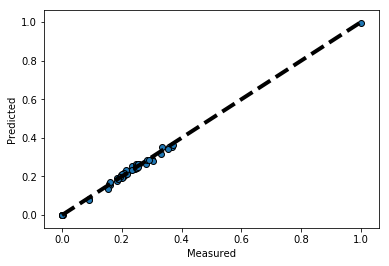

In [69]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Multiplicative Model

In [70]:
df_homeaudio = pd.read_csv("homeaudio.csv")

In [71]:
df_homeaudio.info()
df_homeaudio.shape
df_homeaudio.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
Unnamed: 0                   53 non-null int64
Week                         53 non-null int64
gmv                          53 non-null float64
list_price                   53 non-null float64
units                        53 non-null float64
product_mrp                  53 non-null float64
discount                     53 non-null float64
sla                          53 non-null float64
product_procurement_sla      53 non-null float64
% discount wrt list price    53 non-null float64
Total Investment             53 non-null float64
TV                           53 non-null float64
Digital                      53 non-null float64
Sponsorship                  53 non-null float64
Content Marketing            53 non-null float64
Online marketing             53 non-null float64
 Affiliates                  53 non-null float64
SEM                          53 non-null float64
Radio              

(53, 25)

,Unnamed: 0,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
count,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,...,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00,53.00
mean,26.00,53.00,"2,782,602.88","2,771,236.37","1,474.75","4,715,267.85","1,944,031.48",5.31,2.45,0.62,...,"4,139,171.33","1,311,113.56","1,913,926.12","100,052.55","150,078.82",46.21,"1,091.25",14.02,0.25,0.55
std,15.44,15.44,"1,743,627.74","1,735,765.52",914.27,"3,267,826.73","1,546,335.48",1.36,0.67,0.19,...,"2,113,424.72","648,226.62","1,851,694.19","186,273.29","269,451.53",11.87,280.57,9.32,0.59,1.45
min,0.00,27.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,13.00,40.00,"2,319,685.00","2,303,323.00","1,258.00","3,689,356.00","1,329,534.00",5.40,2.36,0.59,...,"2,494,132.76","829,592.87","1,118,077.90",0.00,0.00,46.93,"1,052.00",6.00,0.00,0.00
50%,26.00,53.00,"2,668,170.00","2,643,253.00","1,457.00","4,334,678.00","1,764,925.00",5.64,2.55,0.65,...,"5,038,104.86","1,602,693.73","1,333,428.35",0.00,0.00,47.31,"1,185.29",13.00,0.00,0.00
75%,39.00,66.00,"3,132,340.00","3,129,478.00","1,698.00","5,458,358.00","2,319,230.00",5.79,2.71,0.72,...,"5,770,035.52","1,750,448.91","1,771,746.29","159,336.29","214,890.32",50.52,"1,222.00",22.00,0.00,0.00
max,52.00,79.00,"12,293,024.00","12,237,300.00","6,455.00","23,084,478.00","10,847,178.00",6.35,4.00,0.92,...,"6,249,002.43","1,889,691.77","8,186,188.71","692,288.71","1,038,433.06",59.99,"1,242.00",30.00,3.00,7.00


In [72]:
df_homeaudio = df_homeaudio.loc[:, ~df_homeaudio.columns.str.contains('^Unnamed')]
df_homeaudio.head()
df_homeaudio.shape
df_homeaudio = df_homeaudio.dropna()
df_homeaudio.shape

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,27,"23,853.00","23,853.00",12.00,"36,986.00","13,133.00",4.50,3.00,0.55,"2,083,187.74",...,"162,056.31","66,817.93","613,377.25",0.00,0.00,54.60,"1,177.00",10,1.00,0.00
1,28,"2,529,221.00","2,521,061.00","1,263.00","3,881,172.00","1,360,111.00",5.83,2.53,0.54,"3,958,056.71",...,"307,906.99","126,954.07","1,165,416.78",0.00,0.00,54.60,"1,177.00",3,0.00,0.00
2,29,"3,014,018.00","2,997,096.00","1,538.00","4,762,021.00","1,764,925.00",5.75,2.58,0.59,"4,374,694.26",...,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00",18,0.00,2.00
3,30,"2,565,623.00","2,549,945.00","1,379.00","4,056,581.00","1,506,636.00",5.83,2.64,0.59,"4,374,694.26",...,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00",25,0.00,0.00
4,31,"1,954,770.00","1,939,004.00","1,011.00","3,105,900.00","1,166,896.00",5.92,2.61,0.60,"3,788,753.34",...,"281,807.85","117,189.11","1,165,498.79",0.00,0.00,56.14,"1,185.29",13,1.00,0.00


(53, 24)

(53, 24)

In [73]:
df_homeaudio=df_homeaudio[df_homeaudio['gmv']!=0]

In [74]:
df_homeaudio.columns

Index(['Week', 'gmv', 'list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date'],
      dtype='object')

In [75]:
df_homeaudio=df_homeaudio.replace(0, 0.001)

In [76]:
df_homeaudio['Week'] = np.log(df_homeaudio['Week'])
df_homeaudio['gmv']=np.log(df_homeaudio['gmv'])
df_homeaudio['list_price']=np.log(df_homeaudio['list_price'])
df_homeaudio['product_mrp']=np.log(df_homeaudio['product_mrp'])
df_homeaudio['discount']=np.log(df_homeaudio['discount'])
df_homeaudio['units']=np.log(df_homeaudio['units'])
df_homeaudio['sla']=np.log(df_homeaudio['sla'])
df_homeaudio['Total Investment']=np.log(df_homeaudio['Total Investment'])
df_homeaudio['product_procurement_sla']=np.log(df_homeaudio['product_procurement_sla'])
df_homeaudio['% discount wrt list price']=np.log(df_homeaudio['% discount wrt list price'])
df_homeaudio['TV']=np.log(df_homeaudio['TV'])
df_homeaudio['Digital']=np.log(df_homeaudio['Digital'])
df_homeaudio['Sponsorship']=np.log(df_homeaudio['Sponsorship'])
df_homeaudio['Content Marketing']=np.log(df_homeaudio['Content Marketing'])
df_homeaudio['Online marketing']=np.log(df_homeaudio['Online marketing'])
df_homeaudio[' Affiliates']=np.log(df_homeaudio[' Affiliates'])
df_homeaudio['Radio']=np.log(df_homeaudio['Radio'])
df_homeaudio['Other']=np.log(df_homeaudio['Other'])
df_homeaudio['SEM']=np.log(df_homeaudio['SEM'])
df_homeaudio['SEM']=np.log(df_homeaudio['SEM'])
df_homeaudio['NPS']=np.log(df_homeaudio['NPS'])
df_homeaudio['Stock_Index']=np.log(df_homeaudio['Stock_Index'])
df_homeaudio['pay_date_diff']=np.log(df_homeaudio['pay_date_diff'])

<Figure size 1440x1080 with 0 Axes>

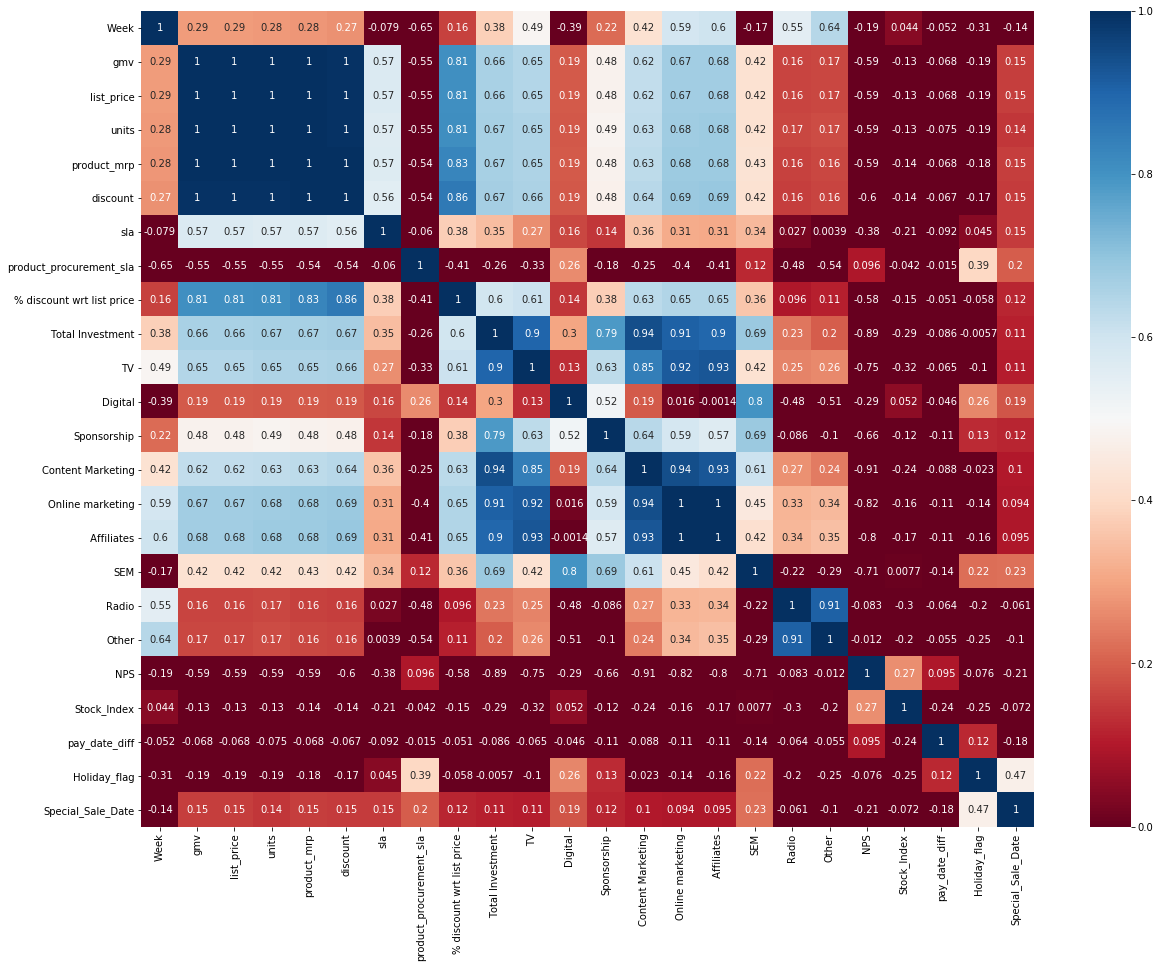

In [77]:
plt.figure(figsize=(20,15))
sns.heatmap(df_homeaudio.corr(),vmin=0,vmax=1,annot=True,cmap='RdBu')

In [78]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

In [79]:
# Get list of columns and remove 'gmv' column (Y)
num_vars = list(df_homeaudio.columns)
##num_vars.remove('gmv')
num_vars
df_homeaudio[num_vars] = scaler.fit_transform(df_homeaudio[num_vars])

['Week',
 'gmv',
 'list_price',
 'units',
 'product_mrp',
 'discount',
 'sla',
 'product_procurement_sla',
 '% discount wrt list price',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 ' Affiliates',
 'SEM',
 'Radio',
 'Other',
 'NPS',
 'Stock_Index',
 'pay_date_diff',
 'Holiday_flag',
 'Special_Sale_Date']

In [80]:
df_homeaudio.shape

(50, 24)

In [81]:
df_homeaudio.head()
df_homeaudio.describe()

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
0,0.00,0.26,0.26,0.28,0.28,0.33,0.00,0.52,0.67,0.01,...,0.10,0.09,0.00,0.00,0.00,0.69,0.73,0.89,0.33,0.00
1,0.03,0.81,0.81,0.81,0.80,0.79,0.75,0.23,0.66,0.22,...,0.26,0.27,0.26,0.00,0.00,0.69,0.73,0.78,0.00,0.00
2,0.07,0.83,0.83,0.84,0.82,0.82,0.71,0.26,0.71,0.25,...,0.29,0.29,0.30,0.00,0.00,0.69,0.73,0.95,0.00,0.29
3,0.10,0.81,0.81,0.82,0.80,0.80,0.75,0.30,0.72,0.25,...,0.29,0.29,0.30,0.00,0.00,0.69,0.73,0.98,0.00,0.00
4,0.13,0.78,0.78,0.79,0.78,0.78,0.79,0.28,0.73,0.20,...,0.24,0.24,0.26,0.00,0.00,0.78,0.77,0.92,0.33,0.00


,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing,Affiliates,SEM,Radio,Other,NPS,Stock_Index,pay_date_diff,Holiday_flag,Special_Sale_Date
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,...,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00
mean,0.61,0.80,0.80,0.81,0.80,0.80,0.64,0.26,0.78,0.67,...,0.84,0.85,0.39,0.36,0.41,0.32,0.64,0.83,0.09,0.07
std,0.28,0.15,0.15,0.15,0.15,0.14,0.19,0.17,0.14,0.23,...,0.26,0.26,0.23,0.46,0.47,0.22,0.35,0.26,0.20,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.42,0.81,0.81,0.81,0.80,0.80,0.57,0.16,0.73,0.61,...,0.90,0.90,0.26,0.00,0.00,0.19,0.28,0.83,0.00,0.00
50%,0.65,0.82,0.82,0.83,0.82,0.82,0.67,0.26,0.78,0.73,...,0.95,0.97,0.32,0.00,0.00,0.26,0.80,0.91,0.00,0.00
75%,0.84,0.84,0.84,0.85,0.84,0.85,0.74,0.35,0.84,0.82,...,0.98,0.98,0.43,0.94,0.93,0.43,0.92,0.97,0.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [82]:
y_train = df_homeaudio.pop('gmv')
X_train = df_homeaudio

# Add a constant using sm.add_constant(X) because if we don't perform this step, 
# statsmodels fits a regression line passing through the origin, by default.
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()

# We will check the parameters obtained
lr_1.params
lr_1.summary()

const                       -0.00
Week                         0.00
list_price                   0.56
units                        0.03
product_mrp                  0.02
discount                     0.46
sla                         -0.00
product_procurement_sla      0.00
% discount wrt list price   -0.07
Total Investment             0.00
TV                          -0.00
Digital                      0.00
Sponsorship                 -0.00
Content Marketing           -0.00
Online marketing            -0.01
 Affiliates                  0.01
SEM                          0.00
Radio                       -0.00
Other                       -0.00
NPS                         -0.00
Stock_Index                  0.00
pay_date_diff               -0.00
Holiday_flag                 0.00
Special_Sale_Date           -0.00
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.687e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           8.31e-73
Time:                        22:01:39   Log-Likelihood:                 359.27
No. Observations:                  50   AIC:                            -672.5
Df Residuals:                      27   BIC:                            -628.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -6.075e-05      0.001     -0.051      0.959      -0.002       0.002
Week                          0.0010      0.000      2.186      0.038    5.91e-05       0.002
list_price                    0.5563      0.027     20.230      0.000       0.500       0.613
units                         0.0329      0.010      3.288      0.003       0.012       0.053
product_mrp                   0.0245      0.046      0.532      0.599      -0.070       0.119
discount                      0.4595      0.023     19.821      0.000       0.412       0.507
sla                       -9.868e-05      0.000     -0.325      0.748      -0.001       0.001
product_procurement_sla       0.0003      0.001      0.570      0.574      -0.001       0.001
% discount wrt list price    -0.0740      0.001    -66.647      0.000      -0.076      -0.072
Total Investment              0.0023      0.002      1.046      0.305      -0.002       0.007
TV                           -0.0001      0.002     -0.095      0.925      -0.003       0.003
Digital                       0.0001      0.001      0.126      0.901      -0.002       0.002
Sponsorship                  -0.0014      0.001     -2.127      0.043      -0.003   -5.03e-05
Content Marketing            -0.0002      0.002     -0.073      0.942      -0.004       0.004
Online marketing             -0.0093      0.018     -0.513      0.612      -0.046       0.028
 Affiliates                   0.0071      0.016      0.439      0.664      -0.026       0.040
SEM                           0.0004      0.001      0.306      0.762      -0.002       0.003
Radio                        -0.0002      0.000     -1.079      0.290      -0.001       0.000
Other                        -0.0001      0.000     -0.540      0.594      -0.001       0.000
NPS                          -0.0005      0.001     -0.636      0.530      -0.002       0.001
Stock_Index                5.831e-06      0.000      0.025      0.980      -0.000       0.000
pay_date_diff             -7.848e-05      0.000     -0.484      0.632      -0.000       0.000
Holiday_flag                  0.0003      0.000      1.158      0.257      -0.000       0.001
Special_Sale_Date         -5.183e-05      0.000     -0.194      0.847      -0.001       0.000
==============================================================================
Omnibus:                        3.859   Durbin-Watson:                   2.625
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.856
Skew:                          -0.403   Prob(JB):                        0.240
Kurtosis:                       3.848   Cond. No.                     5.41e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the

In [83]:
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,discount,inf
7,% discount wrt list price,inf
1,list_price,inf
3,product_mrp,"737,205.30"
13,Online marketing,"188,467.51"
14,Affiliates,"152,505.75"
2,units,"51,192.79"
12,Content Marketing,"1,944.35"
8,Total Investment,"1,908.80"
9,TV,"1,165.29"


## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [84]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# let's start with 15 variables
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [85]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col
X_train.columns[~rfe.support_]

[('Week', True, 1),
 ('list_price', True, 1),
 ('units', True, 1),
 ('product_mrp', True, 1),
 ('discount', True, 1),
 ('sla', False, 5),
 ('product_procurement_sla', True, 1),
 ('% discount wrt list price', True, 1),
 ('Total Investment', True, 1),
 ('TV', False, 6),
 ('Digital', False, 4),
 ('Sponsorship', True, 1),
 ('Content Marketing', False, 3),
 ('Online marketing', True, 1),
 (' Affiliates', True, 1),
 ('SEM', True, 1),
 ('Radio', True, 1),
 ('Other', False, 2),
 ('NPS', True, 1),
 ('Stock_Index', False, 9),
 ('pay_date_diff', False, 7),
 ('Holiday_flag', True, 1),
 ('Special_Sale_Date', False, 8)]

Index(['Week', 'list_price', 'units', 'product_mrp', 'discount',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'Sponsorship', 'Online marketing', ' Affiliates',
       'SEM', 'Radio', 'NPS', 'Holiday_flag'],
      dtype='object')

Index(['sla', 'TV', 'Digital', 'Content Marketing', 'Other', 'Stock_Index',
       'pay_date_diff', 'Special_Sale_Date'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [86]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.527e+06
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.49e-97
Time:                        22:01:40   Log-Likelihood:                 358.64
No. Observations:                  50   AIC:                            -687.3
Df Residuals:                      35   BIC:                            -658.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
2,list_price,inf
5,discount,inf
7,% discount wrt list price,inf
4,product_mrp,"26,779.19"
3,units,"1,177.52"
10,Online marketing,"1,157.08"
11,Affiliates,"1,015.24"
0,const,906.78
8,Total Investment,35.98
14,NPS,17.06


In [87]:
# Drop variable
X_train_new = X_train_rfe.drop(["list_price"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.527e+06
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           6.49e-97
Time:                        22:01:40   Log-Likelihood:                 358.64
No. Observations:                  50   AIC:                            -687.3
Df Residuals:                      35   BIC:                            -658.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
4,discount,"38,184.40"
3,product_mrp,"26,779.19"
2,units,"1,177.52"
9,Online marketing,"1,157.08"
10,Affiliates,"1,015.24"
0,const,906.78
6,% discount wrt list price,423.04
7,Total Investment,35.98
13,NPS,17.06
8,Sponsorship,8.21


In [88]:
# Drop variable
X_train_new = X_train_new.drop(["discount"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.414e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.40e-76
Time:                        22:01:40   Log-Likelihood:                 283.62
No. Observations:                  50   AIC:                            -539.2
Df Residuals:                      36   BIC:                            -512.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
8,Online marketing,"1,079.75"
9,Affiliates,967.45
3,product_mrp,911.33
2,units,881.31
0,const,518.97
6,Total Investment,35.61
12,NPS,11.80
7,Sponsorship,8.16
5,% discount wrt list price,7.82
1,Week,7.59


In [89]:
# Drop variable
X_train_new = X_train_new.drop(["Online marketing"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.339e+04
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.84e-78
Time:                        22:01:40   Log-Likelihood:                 280.71
No. Observations:                  50   AIC:                            -535.4
Df Residuals:                      37   BIC:                            -510.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
3,product_mrp,904.02
2,units,869.37
0,const,413.70
6,Total Investment,35.24
8,Affiliates,22.55
5,% discount wrt list price,7.62
11,NPS,7.56
7,Sponsorship,7.55
1,Week,7.42
9,SEM,4.73


In [90]:
# Drop variable
X_train_new = X_train_new.drop(["product_mrp"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3596.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           9.01e-54
Time:                        22:01:40   Log-Likelihood:                 199.30
No. Observations:                  50   AIC:                            -374.6
Df Residuals:                      38   BIC:                            -351.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,278.97
5,Total Investment,33.05
7,Affiliates,21.24
10,NPS,7.00
6,Sponsorship,6.00
1,Week,5.54
2,units,4.76
8,SEM,4.49
4,% discount wrt list price,4.18
3,product_procurement_sla,3.65


In [91]:
# Drop variable
X_train_new = X_train_new.drop(["Total Investment"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3809.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.75e-55
Time:                        22:01:41   Log-Likelihood:                 197.70
No. Observations:                  50   AIC:                            -373.4
Df Residuals:                      39   BIC:                            -352.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,277.28
6,Affiliates,10.29
9,NPS,6.51
1,Week,5.22
2,units,4.72
4,% discount wrt list price,4.14
7,SEM,3.66
3,product_procurement_sla,3.59
5,Sponsorship,2.83
8,Radio,1.75


In [92]:
# Drop variable
X_train_new = X_train_new.drop([" Affiliates"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4202.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.33e-56
Time:                        22:01:41   Log-Likelihood:                 196.89
No. Observations:                  50   AIC:                            -373.8
Df Residuals:                      40   BIC:                            -354.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

,Features,VIF
0,const,272.14
2,units,4.62
8,NPS,3.93
6,SEM,3.66
4,% discount wrt list price,3.50
3,product_procurement_sla,3.29
5,Sponsorship,2.83
1,Week,2.73
7,Radio,1.72
9,Holiday_flag,1.32


In [93]:
# Drop variable
X_train_new = X_train_new.drop(["% discount wrt list price"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4771.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           2.54e-58
Time:                        22:01:41   Log-Likelihood:                 196.50
No. Observations:                  50   AIC:                            -375.0
Df Residuals:                      41   BIC:                            -357.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,233.74
5,SEM,3.55
7,NPS,3.44
3,product_procurement_sla,3.21
2,units,2.86
4,Sponsorship,2.79
1,Week,2.65
6,Radio,1.71
8,Holiday_flag,1.29


In [94]:
# Drop variable
X_train_new = X_train_new.drop(["Radio"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5281.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.05e-59
Time:                        22:01:41   Log-Likelihood:                 195.11
No. Observations:                  50   AIC:                            -374.2
Df Residuals:                      42   BIC:                            -358.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,224.30
5,SEM,3.54
6,NPS,3.28
3,product_procurement_sla,3.03
2,units,2.84
4,Sponsorship,2.58
1,Week,2.38
7,Holiday_flag,1.28


In [95]:
# Drop variable
X_train_new = X_train_new.drop(["Holiday_flag"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5905.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           5.23e-61
Time:                        22:01:41   Log-Likelihood:                 193.46
No. Observations:                  50   AIC:                            -372.9
Df Residuals:                      43   BIC:                            -359.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,const,223.29
5,SEM,3.54
6,NPS,3.28
3,product_procurement_sla,2.96
2,units,2.80
4,Sponsorship,2.51
1,Week,2.35


In [96]:
X_train_new.columns

Index(['const', 'Week', 'units', 'product_procurement_sla', 'Sponsorship',
       'SEM', 'NPS'],
      dtype='object')

In [97]:
X_train_new = X_train_new.drop(["const"], axis = 1)

In [98]:
drop_columns_list = list(set(num_vars) - set(list(X_train_new.columns)))
print(drop_columns_list)

['% discount wrt list price', 'Online marketing', 'sla', 'Total Investment', 'pay_date_diff', ' Affiliates', 'list_price', 'Holiday_flag', 'discount', 'Content Marketing', 'TV', 'Other', 'Special_Sale_Date', 'gmv', 'product_mrp', 'Digital', 'Radio', 'Stock_Index']


In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train_new, y_train, scoring='r2', cv=folds)
scores   


array([0.96244464, 0.99925875, 0.99916996, 0.80899043, 0.96712113,
       0.99557465, 0.73243915, 0.95585884, 0.94437223, 0.98946441])

In [100]:
y_pred = cross_val_predict(lm, X_train_new, y_train, cv=folds)


In [101]:
mse = mean_squared_error(y_train, y_pred)
r_squared = r2_score(y_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 3.7606395572555715e-05
r_square_value : 0.9982135126432409


Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

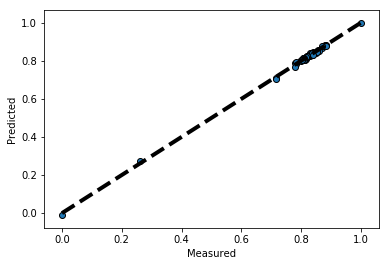

In [102]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# Distributed Lag Model

In [103]:
lag_homeaudio = pd.read_csv("homeaudio.csv")
lag_homeaudio = lag_homeaudio.loc[:, ~lag_homeaudio.columns.str.contains('^Unnamed')]

In [104]:
lag_vars = ['gmv','list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date']

homeaudio_temp1 = lag_homeaudio[lag_vars].shift(1)
homeaudio_temp2 = lag_homeaudio[lag_vars].shift(2)
homeaudio_temp1.columns = ['gmv_lag_1','list_price_lag_1', 'units_lag_1', 'product_mrp_lag_1', 'discount_lag_1', 'sla_lag_1',
       'product_procurement_sla_lag_1', '% discount wrt list price_lag_1',
       'Total Investment_lag_1', 'TV_lag_1', 'Digital_lag_1', 'Sponsorship_lag_1', 'Content Marketing_lag_1',
       'Online marketing_lag_1', ' Affiliates_lag_1', 'SEM_lag_1', 'Radio_lag_1', 'Other_lag_1', 'NPS_lag_1',
       'Stock_Index_lag_1', 'pay_date_diff_lag_1', 'Holiday_flag_lag_1', 'Special_Sale_Date_lag_1']
homeaudio_temp2.columns = ['gmv_lag_2','list_price_lag_2', 'units_lag_2', 'product_mrp_lag_2', 'discount_lag_2', 'sla_lag_2',
       'product_procurement_sla_lag_2', '% discount wrt list price_lag_2',
       'Total Investment_lag_2', 'TV_lag_2', 'Digital_lag_2', 'Sponsorship_lag_2', 'Content Marketing_lag_2',
       'Online marketing_lag_2', ' Affiliates_lag_2', 'SEM_lag_2', 'Radio_lag_2', 'Other_lag_2', 'NPS_lag_2',
       'Stock_Index_lag_2', 'pay_date_diff_lag_2', 'Holiday_flag_lag_2', 'Special_Sale_Date_lag_2']

homeaudio_temp1.head()
homeaudio_temp2.head()

,gmv_lag_1,list_price_lag_1,units_lag_1,product_mrp_lag_1,discount_lag_1,sla_lag_1,product_procurement_sla_lag_1,% discount wrt list price_lag_1,Total Investment_lag_1,TV_lag_1,...,Online marketing_lag_1,Affiliates_lag_1,SEM_lag_1,Radio_lag_1,Other_lag_1,NPS_lag_1,Stock_Index_lag_1,pay_date_diff_lag_1,Holiday_flag_lag_1,Special_Sale_Date_lag_1
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,"23,853.00","23,853.00",12.00,"36,986.00","13,133.00",4.50,3.00,0.55,"2,083,187.74","26,291.12",...,"162,056.31","66,817.93","613,377.25",0.00,0.00,54.60,"1,177.00",10.00,1.00,0.00
2,"2,529,221.00","2,521,061.00","1,263.00","3,881,172.00","1,360,111.00",5.83,2.53,0.54,"3,958,056.71","49,953.13",...,"307,906.99","126,954.07","1,165,416.78",0.00,0.00,54.60,"1,177.00",3.00,0.00,0.00
3,"3,014,018.00","2,997,096.00","1,538.00","4,762,021.00","1,764,925.00",5.75,2.58,0.59,"4,374,694.26","55,211.36",...,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00",18.00,0.00,2.00
4,"2,565,623.00","2,549,945.00","1,379.00","4,056,581.00","1,506,636.00",5.83,2.64,0.59,"4,374,694.26","55,211.36",...,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00",25.00,0.00,0.00


,gmv_lag_2,list_price_lag_2,units_lag_2,product_mrp_lag_2,discount_lag_2,sla_lag_2,product_procurement_sla_lag_2,% discount wrt list price_lag_2,Total Investment_lag_2,TV_lag_2,...,Online marketing_lag_2,Affiliates_lag_2,SEM_lag_2,Radio_lag_2,Other_lag_2,NPS_lag_2,Stock_Index_lag_2,pay_date_diff_lag_2,Holiday_flag_lag_2,Special_Sale_Date_lag_2
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,"23,853.00","23,853.00",12.00,"36,986.00","13,133.00",4.50,3.00,0.55,"2,083,187.74","26,291.12",...,"162,056.31","66,817.93","613,377.25",0.00,0.00,54.60,"1,177.00",10.00,1.00,0.00
3,"2,529,221.00","2,521,061.00","1,263.00","3,881,172.00","1,360,111.00",5.83,2.53,0.54,"3,958,056.71","49,953.13",...,"307,906.99","126,954.07","1,165,416.78",0.00,0.00,54.60,"1,177.00",3.00,0.00,0.00
4,"3,014,018.00","2,997,096.00","1,538.00","4,762,021.00","1,764,925.00",5.75,2.58,0.59,"4,374,694.26","55,211.36",...,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00",18.00,0.00,2.00


In [105]:
lag_homeaudio = pd.concat([lag_homeaudio,homeaudio_temp1],axis=1)
lag_homeaudio.head()
lag_homeaudio.shape
lag_homeaudio = lag_homeaudio[pd.notnull(lag_homeaudio['product_mrp_lag_1'])]
lag_homeaudio.shape
lag_homeaudio = pd.concat([lag_homeaudio,homeaudio_temp2],axis=1)
lag_homeaudio.head()
lag_homeaudio.shape
lag_homeaudio = lag_homeaudio[pd.notnull(lag_homeaudio['product_mrp_lag_2'])]
lag_homeaudio.shape

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing_lag_1,Affiliates_lag_1,SEM_lag_1,Radio_lag_1,Other_lag_1,NPS_lag_1,Stock_Index_lag_1,pay_date_diff_lag_1,Holiday_flag_lag_1,Special_Sale_Date_lag_1
0,27,"23,853.00","23,853.00",12.00,"36,986.00","13,133.00",4.50,3.00,0.55,"2,083,187.74",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,28,"2,529,221.00","2,521,061.00","1,263.00","3,881,172.00","1,360,111.00",5.83,2.53,0.54,"3,958,056.71",...,"162,056.31","66,817.93","613,377.25",0.00,0.00,54.60,"1,177.00",10.00,1.00,0.00
2,29,"3,014,018.00","2,997,096.00","1,538.00","4,762,021.00","1,764,925.00",5.75,2.58,0.59,"4,374,694.26",...,"307,906.99","126,954.07","1,165,416.78",0.00,0.00,54.60,"1,177.00",3.00,0.00,0.00
3,30,"2,565,623.00","2,549,945.00","1,379.00","4,056,581.00","1,506,636.00",5.83,2.64,0.59,"4,374,694.26",...,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00",18.00,0.00,2.00
4,31,"1,954,770.00","1,939,004.00","1,011.00","3,105,900.00","1,166,896.00",5.92,2.61,0.60,"3,788,753.34",...,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00",25.00,0.00,0.00


(53, 47)

(52, 47)

,Week,gmv,list_price,units,product_mrp,discount,sla,product_procurement_sla,% discount wrt list price,Total Investment,...,Online marketing_lag_2,Affiliates_lag_2,SEM_lag_2,Radio_lag_2,Other_lag_2,NPS_lag_2,Stock_Index_lag_2,pay_date_diff_lag_2,Holiday_flag_lag_2,Special_Sale_Date_lag_2
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,28.00,"2,529,221.00","2,521,061.00","1,263.00","3,881,172.00","1,360,111.00",5.83,2.53,0.54,"3,958,056.71",...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,29.00,"3,014,018.00","2,997,096.00","1,538.00","4,762,021.00","1,764,925.00",5.75,2.58,0.59,"4,374,694.26",...,"162,056.31","66,817.93","613,377.25",0.00,0.00,54.60,"1,177.00",10.00,1.00,0.00
3,30.00,"2,565,623.00","2,549,945.00","1,379.00","4,056,581.00","1,506,636.00",5.83,2.64,0.59,"4,374,694.26",...,"307,906.99","126,954.07","1,165,416.78",0.00,0.00,54.60,"1,177.00",3.00,0.00,0.00
4,31.00,"1,954,770.00","1,939,004.00","1,011.00","3,105,900.00","1,166,896.00",5.92,2.61,0.60,"3,788,753.34",...,"340,318.26","140,317.65","1,288,092.23",0.00,0.00,54.60,"1,177.00",18.00,0.00,2.00


(53, 70)

(51, 70)

In [106]:
lag_homeaudio.columns

Index(['Week', 'gmv', 'list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date',
       'gmv_lag_1', 'list_price_lag_1', 'units_lag_1', 'product_mrp_lag_1',
       'discount_lag_1', 'sla_lag_1', 'product_procurement_sla_lag_1',
       '% discount wrt list price_lag_1', 'Total Investment_lag_1', 'TV_lag_1',
       'Digital_lag_1', 'Sponsorship_lag_1', 'Content Marketing_lag_1',
       'Online marketing_lag_1', ' Affiliates_lag_1', 'SEM_lag_1',
       'Radio_lag_1', 'Other_lag_1', 'NPS_lag_1', 'Stock_Index_lag_1',
       'pay_date_diff_lag_1', 'Holiday_flag_lag_1', 'Special_Sale_Date_lag_1',
       'gmv_lag_2', 'list_price_lag_2', 'units_lag_2', 'product_mrp_lag_2',
       'discount_lag_2', 'sla_lag_2'

In [107]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# Get list of columns and remove 'gmv' column (Y)

num_vars = ['gmv', 'list_price', 'units', 'product_mrp', 'discount', 'sla',
       'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date',
       'gmv_lag_1', 'list_price_lag_1', 'units_lag_1', 'product_mrp_lag_1',
       'discount_lag_1', 'sla_lag_1', 'product_procurement_sla_lag_1',
       '% discount wrt list price_lag_1', 'Total Investment_lag_1', 'TV_lag_1',
       'Digital_lag_1', 'Sponsorship_lag_1', 'Content Marketing_lag_1',
       'Online marketing_lag_1', ' Affiliates_lag_1', 'SEM_lag_1',
       'Radio_lag_1', 'Other_lag_1', 'NPS_lag_1', 'Stock_Index_lag_1',
       'pay_date_diff_lag_1', 'Holiday_flag_lag_1', 'Special_Sale_Date_lag_1',
       'gmv_lag_2', 'list_price_lag_2', 'units_lag_2', 'product_mrp_lag_2',
       'discount_lag_2', 'sla_lag_2', 'product_procurement_sla_lag_2',
       '% discount wrt list price_lag_2', 'Total Investment_lag_2', 'TV_lag_2',
       'Digital_lag_2', 'Sponsorship_lag_2', 'Content Marketing_lag_2',
       'Online marketing_lag_2', ' Affiliates_lag_2', 'SEM_lag_2',
       'Radio_lag_2', 'Other_lag_2', 'NPS_lag_2', 'Stock_Index_lag_2',
       'pay_date_diff_lag_2', 'Holiday_flag_lag_2', 'Special_Sale_Date_lag_2']
homeaudio_lag_scaled = lag_homeaudio
homeaudio_lag_scaled[num_vars] = scaler.fit_transform(homeaudio_lag_scaled[num_vars])

In [108]:
# Running RFE with the output number of the variable equal to 15 
y_h_lag_train = homeaudio_lag_scaled['gmv']
X_h_lag_train = homeaudio_lag_scaled.drop(['gmv'],axis=1)
lm = LinearRegression()
lm.fit(X_h_lag_train, y_h_lag_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_h_lag_train, y_h_lag_train)
list(zip(X_h_lag_train.columns,rfe.support_,rfe.ranking_))
col = X_h_lag_train.columns[rfe.support_]
col
X_h_lag_train.columns[~rfe.support_] # shows that all columns are taken into consideration

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

[('Week', False, 55),
 ('list_price', True, 1),
 ('units', True, 1),
 ('product_mrp', True, 1),
 ('discount', True, 1),
 ('sla', False, 16),
 ('product_procurement_sla', False, 40),
 ('% discount wrt list price', False, 32),
 ('Total Investment', False, 30),
 ('TV', False, 21),
 ('Digital', False, 25),
 ('Sponsorship', False, 22),
 ('Content Marketing', False, 31),
 ('Online marketing', False, 23),
 (' Affiliates', False, 37),
 ('SEM', False, 36),
 ('Radio', False, 35),
 ('Other', False, 51),
 ('NPS', False, 15),
 ('Stock_Index', False, 38),
 ('pay_date_diff', False, 26),
 ('Holiday_flag', False, 48),
 ('Special_Sale_Date', False, 52),
 ('gmv_lag_1', True, 1),
 ('list_price_lag_1', False, 45),
 ('units_lag_1', True, 1),
 ('product_mrp_lag_1', False, 41),
 ('discount_lag_1', False, 14),
 ('sla_lag_1', False, 43),
 ('product_procurement_sla_lag_1', False, 46),
 ('% discount wrt list price_lag_1', False, 13),
 ('Total Investment_lag_1', True, 1),
 ('TV_lag_1', True, 1),
 ('Digital_lag_1',

Index(['list_price', 'units', 'product_mrp', 'discount', 'gmv_lag_1',
       'units_lag_1', 'Total Investment_lag_1', 'TV_lag_1',
       'Sponsorship_lag_1', 'Content Marketing_lag_1',
       'Online marketing_lag_1', ' Affiliates_lag_1', 'Radio_lag_1',
       'Digital_lag_2', 'SEM_lag_2'],
      dtype='object')

Index(['Week', 'sla', 'product_procurement_sla', '% discount wrt list price',
       'Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', ' Affiliates', 'SEM', 'Radio', 'Other', 'NPS',
       'Stock_Index', 'pay_date_diff', 'Holiday_flag', 'Special_Sale_Date',
       'list_price_lag_1', 'product_mrp_lag_1', 'discount_lag_1', 'sla_lag_1',
       'product_procurement_sla_lag_1', '% discount wrt list price_lag_1',
       'Digital_lag_1', 'SEM_lag_1', 'Other_lag_1', 'NPS_lag_1',
       'Stock_Index_lag_1', 'pay_date_diff_lag_1', 'Holiday_flag_lag_1',
       'Special_Sale_Date_lag_1', 'gmv_lag_2', 'list_price_lag_2',
       'units_lag_2', 'product_mrp_lag_2', 'discount_lag_2', 'sla_lag_2',
       'product_procurement_sla_lag_2', '% discount wrt list price_lag_2',
       'Total Investment_lag_2', 'TV_lag_2', 'Sponsorship_lag_2',
       'Content Marketing_lag_2', 'Online marketing_lag_2',
       ' Affiliates_lag_2', 'Radio_lag_2', 'Other_lag_2', 

In [109]:
### Building model using statsmodel, for the detailed statistics

# Creating X_test dataframe with RFE selected variables
X_h_lag_train_rfe = X_h_lag_train[col]
#X_c_lag_train_rfe = X_c_lag_train[col]

# Adding a constant variable
import statsmodels.api as sm
X_h_lag_train_lm = sm.add_constant(X_h_lag_train_rfe)

# Running the linear model
lm = sm.OLS(y_h_lag_train, X_h_lag_train_lm).fit()
# Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_h_lag_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_h_lag_train_lm.values, i) for i in range(X_h_lag_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.134e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.82e-87
Time:                        22:01:44   Log-Likelihood:                 326.67
No. Observations:                  51   AIC:                            -623.3
Df Residuals:                      36   BIC:                            -594.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
1,list_price,inf
3,product_mrp,inf
4,discount,inf
7,Total Investment_lag_1,993.10
12,Affiliates_lag_1,496.38
11,Online marketing_lag_1,482.93
9,Sponsorship_lag_1,356.30
6,units_lag_1,280.23
5,gmv_lag_1,276.89
2,units,263.23


In [110]:
# 'list_price' is having high vif 

X_h_lag_train_rfe= X_h_lag_train_rfe.drop(["list_price"],axis=1)
X_h_lag_train_lm = sm.add_constant(X_h_lag_train_rfe)

lm = sm.OLS(y_h_lag_train,X_h_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_h_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_h_lag_train_rfe.values, i) for i in range(X_h_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.134e+05
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.82e-87
Time:                        22:01:44   Log-Likelihood:                 326.67
No. Observations:                  51   AIC:                            -623.3
Df Residuals:                      36   BIC:                            -594.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
1,product_mrp,"4,371.91"
5,Total Investment_lag_1,"3,557.24"
10,Affiliates_lag_1,"2,829.27"
9,Online marketing_lag_1,"2,581.07"
2,discount,"1,367.76"
4,units_lag_1,"1,101.15"
3,gmv_lag_1,"1,065.11"
0,units,"1,003.29"
7,Sponsorship_lag_1,888.29
13,SEM_lag_2,191.14


In [111]:
# 'product_mrp' is having high vif 

X_h_lag_train_rfe= X_h_lag_train_rfe.drop(["product_mrp"],axis=1)
X_h_lag_train_lm = sm.add_constant(X_h_lag_train_rfe)

lm = sm.OLS(y_h_lag_train,X_h_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_h_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_h_lag_train_rfe.values, i) for i in range(X_h_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1116.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           7.71e-44
Time:                        22:01:44   Log-Likelihood:                 180.38
No. Observations:                  51   AIC:                            -332.8
Df Residuals:                      37   BIC:                            -305.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
4,Total Investment_lag_1,"3,187.86"
9,Affiliates_lag_1,"2,820.64"
8,Online marketing_lag_1,"2,579.75"
3,units_lag_1,"1,003.64"
2,gmv_lag_1,967.25
6,Sponsorship_lag_1,809.26
12,SEM_lag_2,185.95
11,Digital_lag_2,148.25
0,units,133.65
1,discount,91.38


In [112]:
# 'Total Investment_lag_1' is having high vif 

X_h_lag_train_rfe= X_h_lag_train_rfe.drop(["Total Investment_lag_1"],axis=1)
X_h_lag_train_lm = sm.add_constant(X_h_lag_train_rfe)

lm = sm.OLS(y_h_lag_train,X_h_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_h_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_h_lag_train_rfe.values, i) for i in range(X_h_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1133.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.20e-44
Time:                        22:01:44   Log-Likelihood:                 178.06
No. Observations:                  51   AIC:                            -330.1
Df Residuals:                      38   BIC:                            -305.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
7,Online marketing_lag_1,"2,568.23"
8,Affiliates_lag_1,"2,561.21"
3,units_lag_1,"1,002.77"
2,gmv_lag_1,963.77
11,SEM_lag_2,176.47
10,Digital_lag_2,130.37
0,units,122.26
1,discount,88.25
4,TV_lag_1,29.36
5,Sponsorship_lag_1,27.18


In [113]:
# 'Online marketing_lag_1' is having high vif 

X_h_lag_train_rfe= X_h_lag_train_rfe.drop(["Online marketing_lag_1"],axis=1)
X_h_lag_train_lm = sm.add_constant(X_h_lag_train_rfe)

lm = sm.OLS(y_h_lag_train,X_h_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_h_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_h_lag_train_rfe.values, i) for i in range(X_h_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1267.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           3.36e-46
Time:                        22:01:46   Log-Likelihood:                 178.02
No. Observations:                  51   AIC:                            -332.0
Df Residuals:                      39   BIC:                            -308.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
3,units_lag_1,997.52
2,gmv_lag_1,954.86
10,SEM_lag_2,170.59
9,Digital_lag_2,123.50
0,units,121.78
1,discount,88.21
7,Affiliates_lag_1,33.82
5,Sponsorship_lag_1,19.07
4,TV_lag_1,16.34
6,Content Marketing_lag_1,13.86


In [114]:
# 'units_lag_1' is having high vif 

X_h_lag_train_rfe= X_h_lag_train_rfe.drop(["units_lag_1"],axis=1)
X_h_lag_train_lm = sm.add_constant(X_h_lag_train_rfe)

lm = sm.OLS(y_h_lag_train,X_h_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_h_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_h_lag_train_rfe.values, i) for i in range(X_h_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1318.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.34e-47
Time:                        22:01:46   Log-Likelihood:                 175.96
No. Observations:                  51   AIC:                            -329.9
Df Residuals:                      40   BIC:                            -308.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
9,SEM_lag_2,168.33
8,Digital_lag_2,122.31
0,units,120.36
1,discount,87.23
6,Affiliates_lag_1,33.30
4,Sponsorship_lag_1,17.23
3,TV_lag_1,16.32
5,Content Marketing_lag_1,13.75
2,gmv_lag_1,7.64
7,Radio_lag_1,3.32


In [115]:
# 'SEM_lag_2' is having high vif 

X_h_lag_train_rfe= X_h_lag_train_rfe.drop(["SEM_lag_2"],axis=1)
X_h_lag_train_lm = sm.add_constant(X_h_lag_train_rfe)

lm = sm.OLS(y_h_lag_train,X_h_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_h_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_h_lag_train_rfe.values, i) for i in range(X_h_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1457.
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.98e-48
Time:                        22:01:46   Log-Likelihood:                 175.21
No. Observations:                  51   AIC:                            -330.4
Df Residuals:                      41   BIC:                            -311.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
0,units,120.27
1,discount,86.63
6,Affiliates_lag_1,14.56
4,Sponsorship_lag_1,13.71
5,Content Marketing_lag_1,13.68
3,TV_lag_1,9.63
2,gmv_lag_1,6.88
8,Digital_lag_2,6.56
7,Radio_lag_1,2.91


In [116]:
# 'units' is having high vif 

X_h_lag_train_rfe= X_h_lag_train_rfe.drop(["units"],axis=1)
X_h_lag_train_lm = sm.add_constant(X_h_lag_train_rfe)

lm = sm.OLS(y_h_lag_train,X_h_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_h_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_h_lag_train_rfe.values, i) for i in range(X_h_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     226.1
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           5.63e-32
Time:                        22:01:46   Log-Likelihood:                 124.58
No. Observations:                  51   AIC:                            -231.2
Df Residuals:                      42   BIC:                            -213.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
5,Affiliates_lag_1,13.27
4,Content Marketing_lag_1,10.87
3,Sponsorship_lag_1,10.68
2,TV_lag_1,9.39
1,gmv_lag_1,6.37
7,Digital_lag_2,5.97
0,discount,4.28
6,Radio_lag_1,2.85


In [117]:
# ' Affiliates_lag_1' is having high vif 

X_h_lag_train_rfe= X_h_lag_train_rfe.drop([" Affiliates_lag_1"],axis=1)
X_h_lag_train_lm = sm.add_constant(X_h_lag_train_rfe)

lm = sm.OLS(y_h_lag_train,X_h_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_h_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_h_lag_train_rfe.values, i) for i in range(X_h_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     254.9
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           7.22e-33
Time:                        22:01:46   Log-Likelihood:                 123.66
No. Observations:                  51   AIC:                            -231.3
Df Residuals:                      43   BIC:                            -215.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
4,Content Marketing_lag_1,10.64
3,Sponsorship_lag_1,10.09
2,TV_lag_1,7.96
6,Digital_lag_2,5.97
1,gmv_lag_1,5.19
0,discount,3.78
5,Radio_lag_1,2.33


In [118]:
# 'Content Marketing_lag_1' is having high vif 

X_h_lag_train_rfe= X_h_lag_train_rfe.drop(["Content Marketing_lag_1"],axis=1)
X_h_lag_train_lm = sm.add_constant(X_h_lag_train_rfe)

lm = sm.OLS(y_h_lag_train,X_h_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_h_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_h_lag_train_rfe.values, i) for i in range(X_h_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     293.3
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           8.72e-34
Time:                        22:01:47   Log-Likelihood:                 122.74
No. Observations:                  51   AIC:                            -231.5
Df Residuals:                      44   BIC:                            -218.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0353      0.00

,Features,VIF
3,Sponsorship_lag_1,6.10
2,TV_lag_1,5.56
1,gmv_lag_1,5.19
0,discount,3.16
5,Digital_lag_2,2.94
4,Radio_lag_1,1.74


In [119]:
# 'Sponsorship_lag_1' is having high vif 

X_h_lag_train_rfe= X_h_lag_train_rfe.drop(["Sponsorship_lag_1"],axis=1)
X_h_lag_train_lm = sm.add_constant(X_h_lag_train_rfe)

lm = sm.OLS(y_h_lag_train,X_h_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_h_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_h_lag_train_rfe.values, i) for i in range(X_h_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     342.3
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           1.31e-34
Time:                        22:01:47   Log-Likelihood:                 121.48
No. Observations:                  51   AIC:                            -231.0
Df Residuals:                      45   BIC:                            -219.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0367      0.008      4.783

,Features,VIF
1,gmv_lag_1,4.88
2,TV_lag_1,4.28
0,discount,2.86
4,Digital_lag_2,2.74
3,Radio_lag_1,1.50


In [120]:
# 'Radio_lag_1' is having high P-Value

X_h_lag_train_rfe= X_h_lag_train_rfe.drop(["Radio_lag_1"],axis=1)
X_h_lag_train_lm = sm.add_constant(X_h_lag_train_rfe)

lm = sm.OLS(y_h_lag_train,X_h_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_h_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_h_lag_train_rfe.values, i) for i in range(X_h_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     432.6
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           7.49e-36
Time:                        22:01:47   Log-Likelihood:                 121.21
No. Observations:                  51   AIC:                            -232.4
Df Residuals:                      46   BIC:                            -222.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0362      0.008      4.763

,Features,VIF
1,gmv_lag_1,4.67
2,TV_lag_1,4.09
0,discount,2.82
3,Digital_lag_2,2.40


In [121]:
# 'Digital_lag_2' is having high P-Value

X_h_lag_train_rfe= X_h_lag_train_rfe.drop(["Digital_lag_2"],axis=1)
X_h_lag_train_lm = sm.add_constant(X_h_lag_train_rfe)

lm = sm.OLS(y_h_lag_train,X_h_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_h_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_h_lag_train_rfe.values, i) for i in range(X_h_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     576.3
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.71e-37
Time:                        22:01:47   Log-Likelihood:                 120.66
No. Observations:                  51   AIC:                            -233.3
Df Residuals:                      47   BIC:                            -225.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0352      0.008      4.670      0.0

,Features,VIF
2,TV_lag_1,4.08
1,gmv_lag_1,3.71
0,discount,2.80


In [122]:
# 'TV_lag_1' is having high P-Value 

X_h_lag_train_rfe= X_h_lag_train_rfe.drop(["TV_lag_1"],axis=1)
X_h_lag_train_lm = sm.add_constant(X_h_lag_train_rfe)

lm = sm.OLS(y_h_lag_train,X_h_lag_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())
# We create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_h_lag_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_h_lag_train_rfe.values, i) for i in range(X_h_lag_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     837.4
Date:                Sun, 22 Sep 2019   Prob (F-statistic):           4.78e-38
Time:                        22:01:47   Log-Likelihood:                 119.35
No. Observations:                  51   AIC:                            -232.7
Df Residuals:                      48   BIC:                            -226.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0387      0.007      5.297      0.0

,Features,VIF
0,discount,2.32
1,gmv_lag_1,2.32


In [123]:
X_h_lag_train_rfe.columns

Index(['discount', 'gmv_lag_1'], dtype='object')

In [124]:
drop_columns_list = list(set(num_vars) - set(list(X_h_lag_train_rfe.columns)))
print(drop_columns_list)

['Holiday_flag_lag_2', 'Total Investment', 'Sponsorship', 'TV', 'Other', ' Affiliates_lag_2', 'Special_Sale_Date_lag_1', 'units_lag_1', 'discount_lag_2', 'product_procurement_sla_lag_1', 'product_mrp_lag_1', 'pay_date_diff', 'Other_lag_1', 'Holiday_flag', 'sla_lag_1', 'Online marketing_lag_1', 'SEM', 'Radio', 'pay_date_diff_lag_2', 'sla', 'Total Investment_lag_2', 'Content Marketing_lag_2', 'gmv_lag_2', 'Content Marketing', 'gmv', 'Digital', '% discount wrt list price_lag_1', 'Online marketing_lag_2', 'Special_Sale_Date_lag_2', 'Holiday_flag_lag_1', 'Special_Sale_Date', 'units', 'Total Investment_lag_1', 'sla_lag_2', 'TV_lag_2', 'NPS_lag_1', 'Online marketing', 'Radio_lag_2', 'pay_date_diff_lag_1', 'Stock_Index_lag_1', 'Radio_lag_1', 'discount_lag_1', 'Sponsorship_lag_1', '% discount wrt list price_lag_2', 'Stock_Index_lag_2', 'SEM_lag_2', 'Digital_lag_2', 'product_mrp_lag_2', 'list_price_lag_1', 'product_procurement_sla', ' Affiliates', 'list_price', 'list_price_lag_2', 'units_lag_2',

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score 

folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_h_lag_train_rfe, y_h_lag_train, scoring='r2', cv=folds)
scores   


array([0.95185002, 0.94500423, 0.69677072, 0.65386055, 0.49208477,
       0.99599649, 0.77333775, 0.6079275 , 0.87856656, 0.9384049 ])

In [126]:
y_pred = cross_val_predict(lm, X_h_lag_train_rfe, y_h_lag_train, cv=folds)


In [127]:
mse = mean_squared_error(y_h_lag_train, y_pred)
r_squared = r2_score(y_h_lag_train, y_pred)
print('Mean_Squared_Error :' ,mse) 
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0007349516702268187
r_square_value : 0.9622981964156739


Text(0.5, 0, 'Measured')

Text(0, 0.5, 'Predicted')

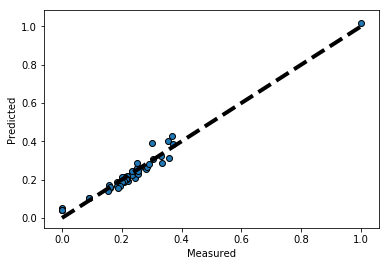

In [128]:
fig, ax = plt.subplots()
ax.scatter(y_h_lag_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_h_lag_train.min(),y_h_lag_train.max()], [y_h_lag_train.min(), y_h_lag_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()